<a href="https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/advisor/wp-content/uploads/2019/08/pile_of_credit_cards-1.jpg"></a>

<img src="https://d187qskirji7ti.cloudfront.net/news/wp-content/uploads/2019/01/american-express-centurion-black-card.jpg" width="1000px">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

<h5>
Data Dictionary for Market Segmentation:

    spending: Amount spent by the customer per month (in 1000s)
    advance_payments: Amount paid by the customer in advance by cash (in 100s)
    probability_of_full_payment: Probability of payment done in full by the customer to the bank
    current_balance: Balance amount left in the account to make purchases (in 1000s)
    credit_limit: Limit of the amount in credit card (10000s)
    min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
    max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)
</h5>

In [2]:
df_data = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df_data["spending"] = 1000 * df_data["spending"]

In [5]:
df_data["advance_payments"] = 100 * df_data["advance_payments"]

In [6]:
df_data["current_balance"] = 1000 * df_data["current_balance"]

In [7]:
df_data["credit_limit"] = 10000 * df_data["credit_limit"]

In [8]:
df_data["min_payment_amt"] = 100 * df_data["min_payment_amt"]

In [9]:
df_data["max_spent_in_single_shopping"] = 1000 * df_data["max_spent_in_single_shopping"]

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [11]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14847.523810,2909.699431,10590.0000,12270.0000,14355.00000,17305.000000,21180.0000
advance_payments,210.0,1455.928571,130.595873,1241.0000,1345.0000,1432.00000,1571.500000,1725.0000
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.8569,0.87345,0.887775,0.9183
current_balance,210.0,5628.533333,443.063478,4899.0000,5262.2500,5523.50000,5979.750000,6675.0000
credit_limit,210.0,32586.047619,3777.144449,26300.0000,29440.0000,32370.00000,35617.500000,40330.0000
min_payment_amt,210.0,370.020095,150.355713,76.5100,256.1500,359.90000,476.875000,845.6000
max_spent_in_single_shopping,210.0,5408.071429,491.480499,4519.0000,5045.0000,5223.00000,5877.000000,6550.0000


In [12]:
df_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


<h5>
1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.
</h5>

In [13]:
df_data.shape

(210, 7)

In [14]:
df_data.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [15]:
df_data.isnull().values.any()

False

In [16]:
df_data.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [17]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_data[column].describe(),end=' ')
    
    
    plt.figure()
    sns.set(style = 'whitegrid')
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(data=df_data, x=df_data[column], kde=True)
    plt.show()
    
    
    
    plt.figure()
#    sns.set(style = 'whitegrid')
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_data[column])
    plt.show()

In [18]:
#df_num = df_data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_data.columns.values)
len(lstnumericcolumns)

7

Description of spending
----------------------------------------------------------------------------
count      210.000000
mean     14847.523810
std       2909.699431
min      10590.000000
25%      12270.000000
50%      14355.000000
75%      17305.000000
max      21180.000000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

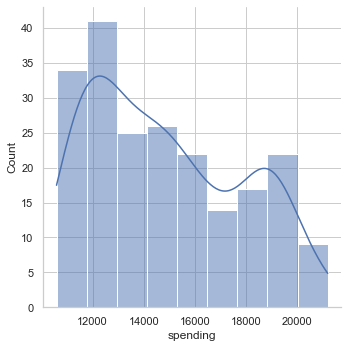

BoxPlot of spending
----------------------------------------------------------------------------


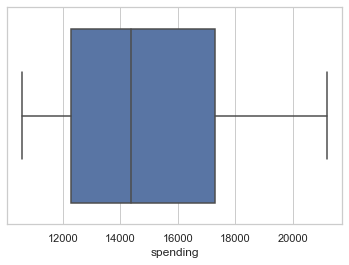

Description of advance_payments
----------------------------------------------------------------------------
count     210.000000
mean     1455.928571
std       130.595873
min      1241.000000
25%      1345.000000
50%      1432.000000
75%      1571.500000
max      1725.000000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

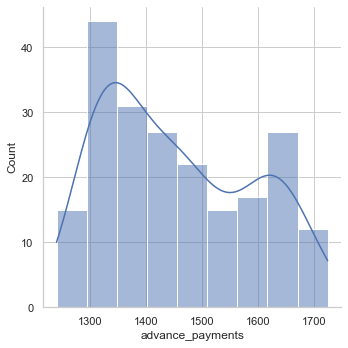

BoxPlot of advance_payments
----------------------------------------------------------------------------


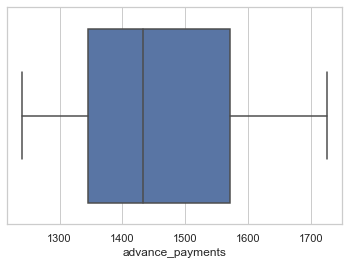

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

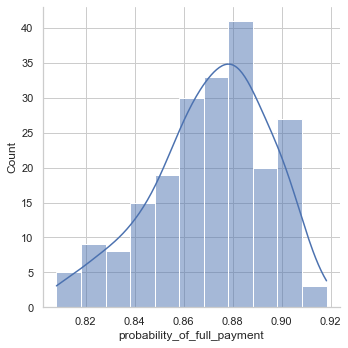

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


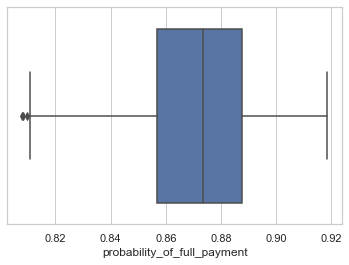

Description of current_balance
----------------------------------------------------------------------------
count     210.000000
mean     5628.533333
std       443.063478
min      4899.000000
25%      5262.250000
50%      5523.500000
75%      5979.750000
max      6675.000000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

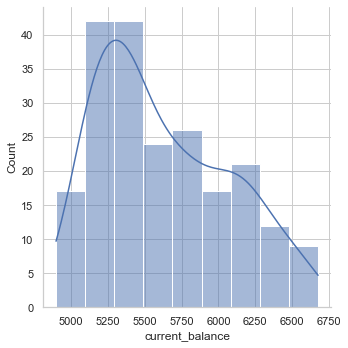

BoxPlot of current_balance
----------------------------------------------------------------------------


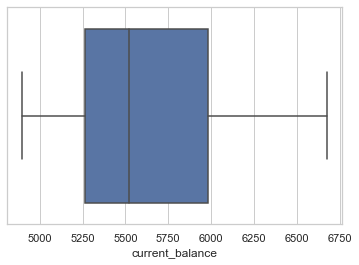

Description of credit_limit
----------------------------------------------------------------------------
count      210.000000
mean     32586.047619
std       3777.144449
min      26300.000000
25%      29440.000000
50%      32370.000000
75%      35617.500000
max      40330.000000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

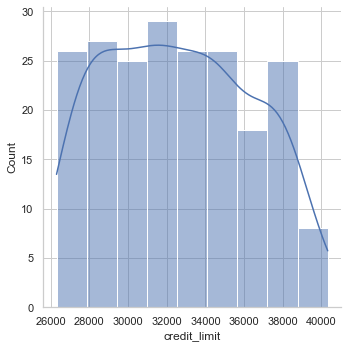

BoxPlot of credit_limit
----------------------------------------------------------------------------


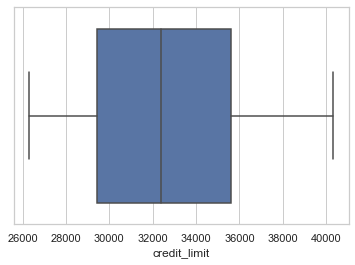

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean     370.020095
std      150.355713
min       76.510000
25%      256.150000
50%      359.900000
75%      476.875000
max      845.600000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

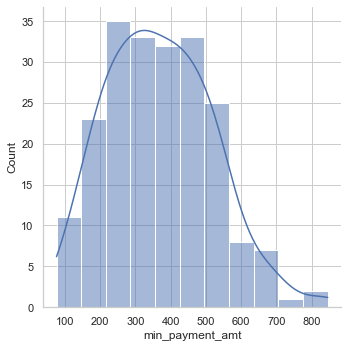

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


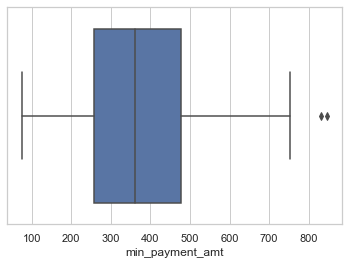

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count     210.000000
mean     5408.071429
std       491.480499
min      4519.000000
25%      5045.000000
50%      5223.000000
75%      5877.000000
max      6550.000000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

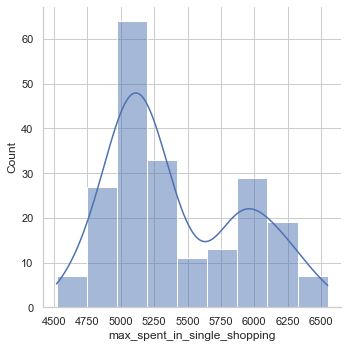

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


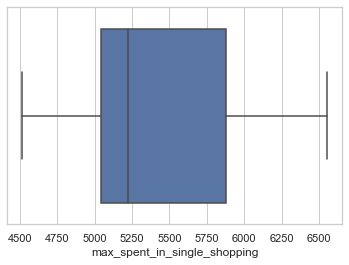

In [19]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [20]:
# skewness along the index axis
df_data.skew(axis = 0, skipna = True)

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64


##    A normal distribution has a skew of zero
## As a general rule of thumb:
## If skewness is less than -1 or greater than 1, the distribution is highly skewed.
## If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
## If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.


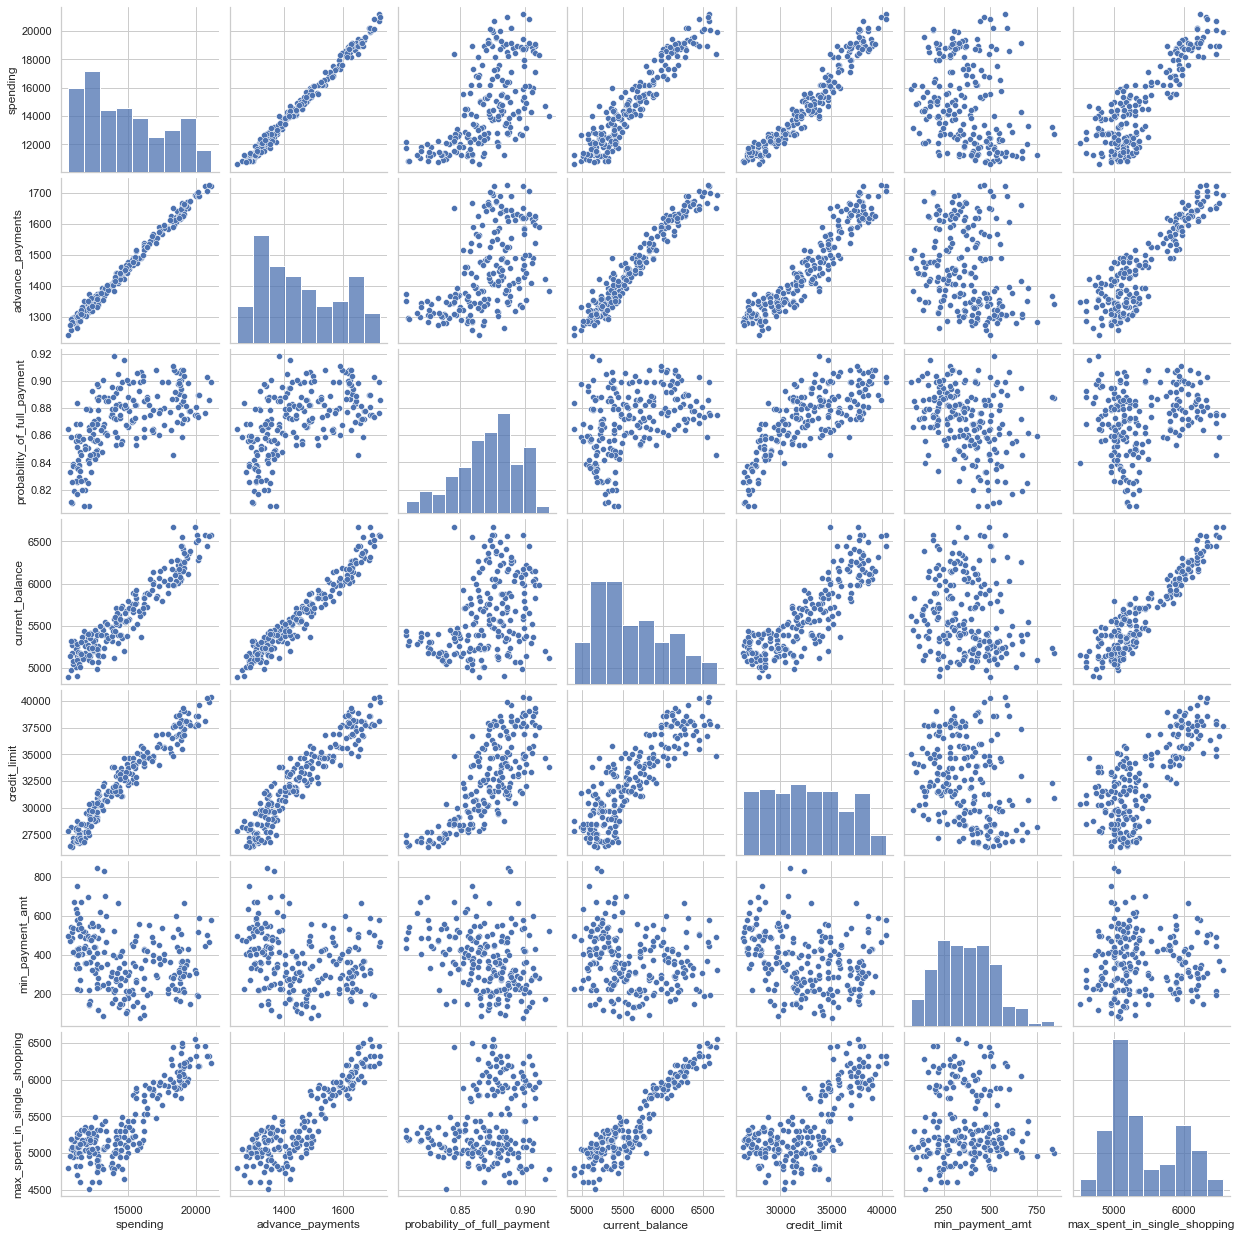

In [21]:
sns.pairplot(df_data)
plt.show()

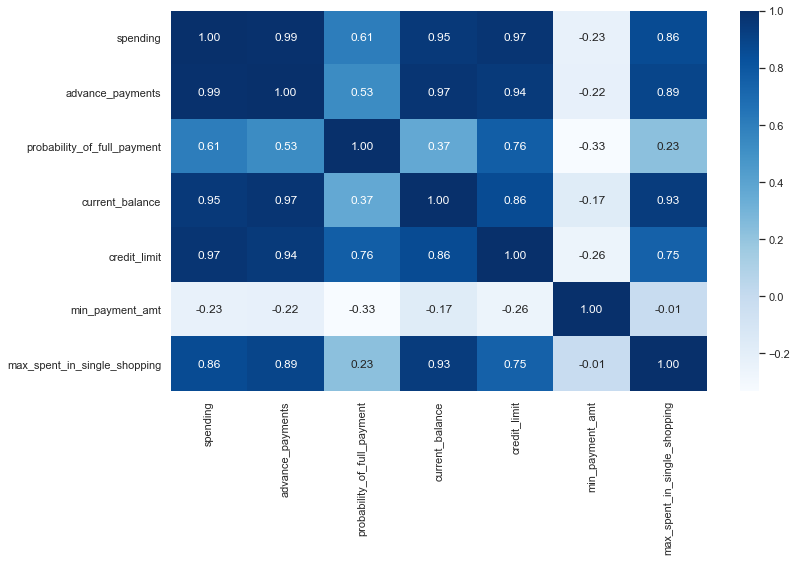

In [22]:
plt.figure(figsize=(12,7))
sns.heatmap(df_data.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

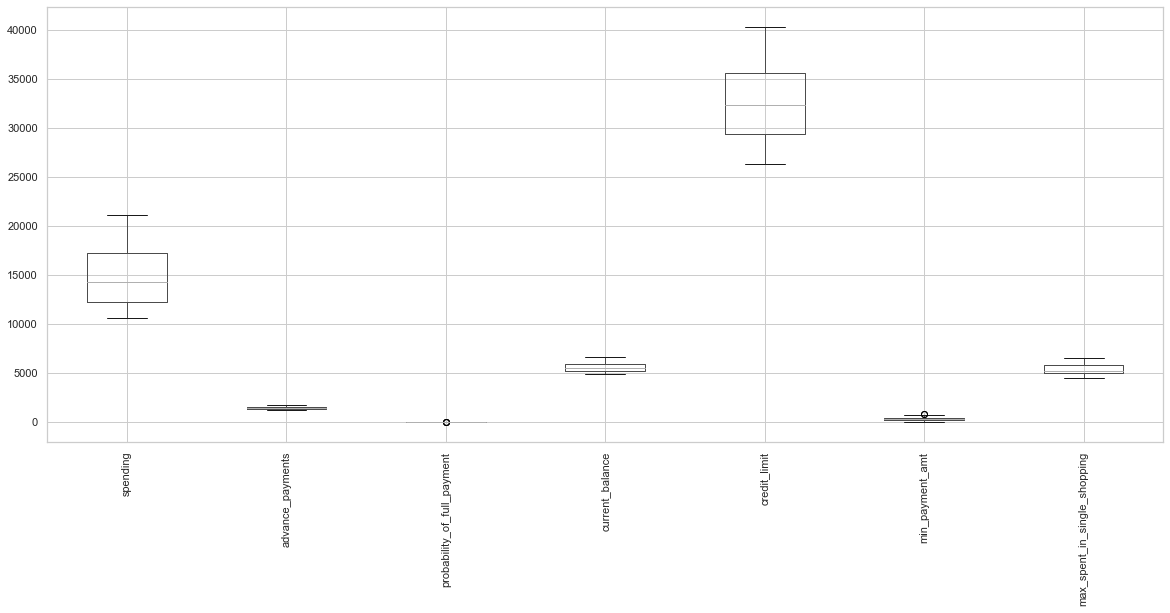

In [23]:
df_data.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

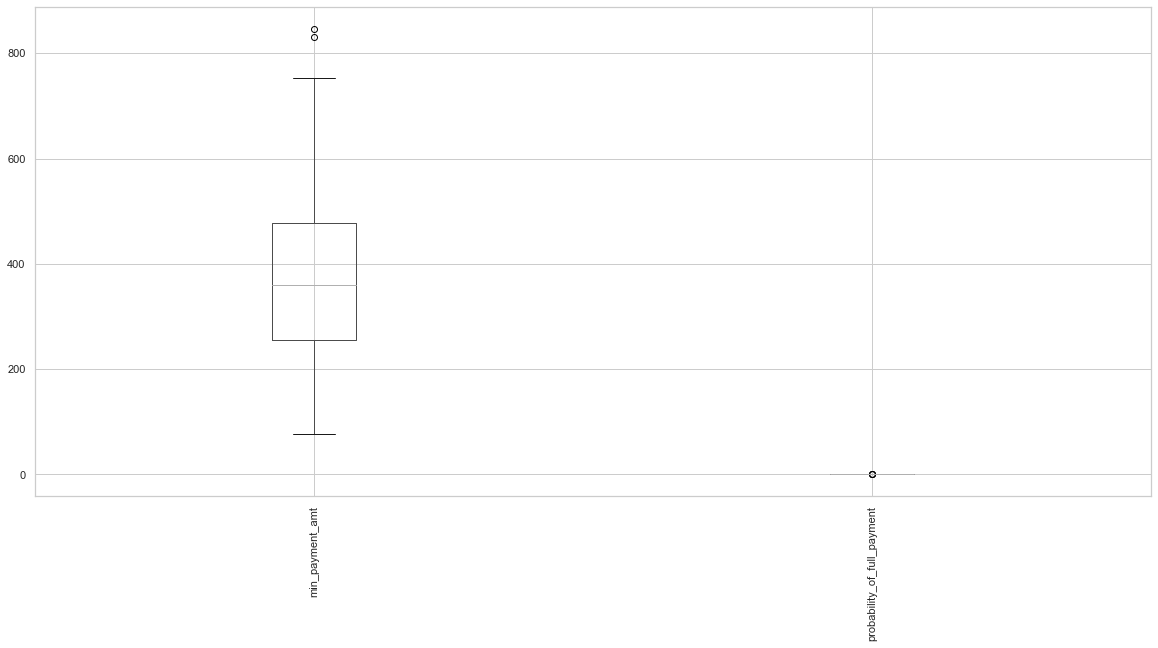

In [24]:
df_data.boxplot(figsize=(20,9),column=['min_payment_amt','probability_of_full_payment'])
plt.xticks(rotation=90)
plt.show()

In [25]:
no_outlier = ['spending','advance_payments','current_balance','credit_limit','max_spent_in_single_shopping']
#outlier_list = [x for x in df_data.columns if x not in no_outlier]

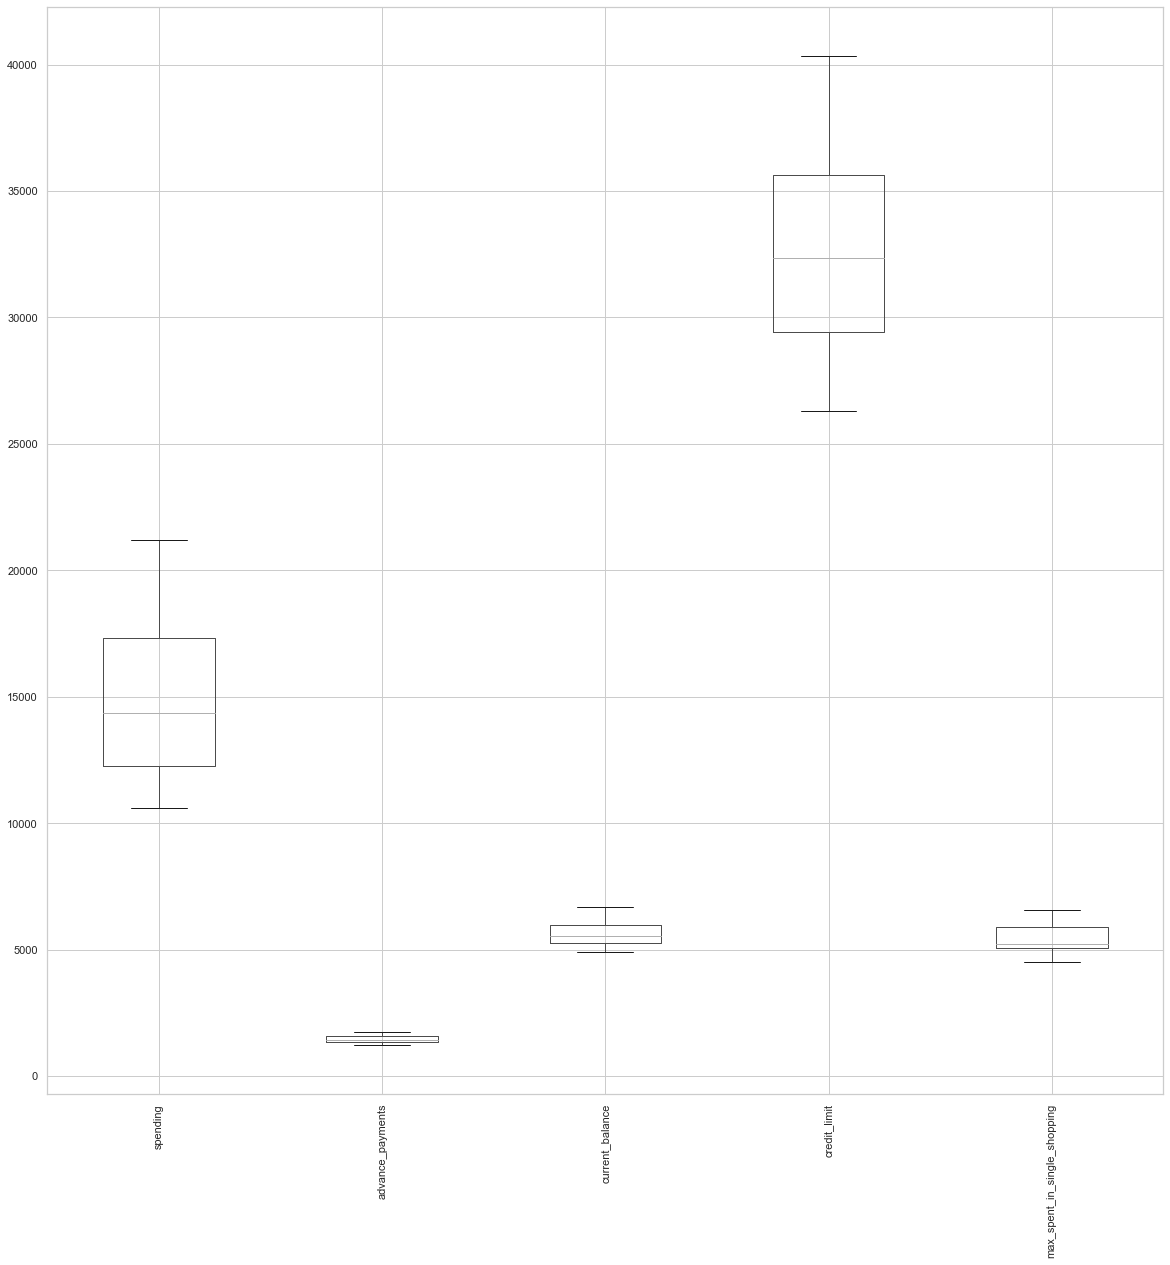

In [26]:
df_data[no_outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [27]:
    q25=np.percentile(df_data["probability_of_full_payment"],25)
    q75=np.percentile(df_data["probability_of_full_payment"],75)
#    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    mean1 = df_data.probability_of_full_payment.mean()
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

In [28]:
df_data["probability_of_full_payment"] = np.where(df_data["probability_of_full_payment"] < lower_bound, lower_bound,df_data['probability_of_full_payment'])
df_data["probability_of_full_payment"] = np.where(df_data["probability_of_full_payment"] > upper_bound, upper_bound,df_data['probability_of_full_payment'])
print(df_data['probability_of_full_payment'].skew())



-0.522793301637402


In [29]:
df_data.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14847.523810,1455.928571,0.871025,5628.533333,32586.047619,370.020095,5408.071429
std,2909.699431,130.595873,0.023560,443.063478,3777.144449,150.355713,491.480499
min,10590.000000,1241.000000,0.810588,4899.000000,26300.000000,76.510000,4519.000000
25%,12270.000000,1345.000000,0.856900,5262.250000,29440.000000,256.150000,5045.000000
50%,14355.000000,1432.000000,0.873450,5523.500000,32370.000000,359.900000,5223.000000
75%,17305.000000,1571.500000,0.887775,5979.750000,35617.500000,476.875000,5877.000000
max,21180.000000,1725.000000,0.918300,6675.000000,40330.000000,845.600000,6550.000000


In [30]:
    q25_2=np.percentile(df_data["min_payment_amt"],25)
    q75_2=np.percentile(df_data["min_payment_amt"],75)
#    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR_2=q75_2-q25_2
    mean2 = df_data.min_payment_amt.mean()
    #Calculating minimum threshold
    lower_bound_2=q25_2-(1.5*IQR_2)
    upper_bound_2=q75_2+(1.5*IQR_2)

In [31]:
df_data["min_payment_amt"] = np.where(df_data["min_payment_amt"] < lower_bound_2,mean2,df_data['min_payment_amt'])
df_data["min_payment_amt"] = np.where(df_data["min_payment_amt"] > upper_bound_2,mean2,df_data['min_payment_amt'])
print(df_data['min_payment_amt'].skew())


0.22096532476682895


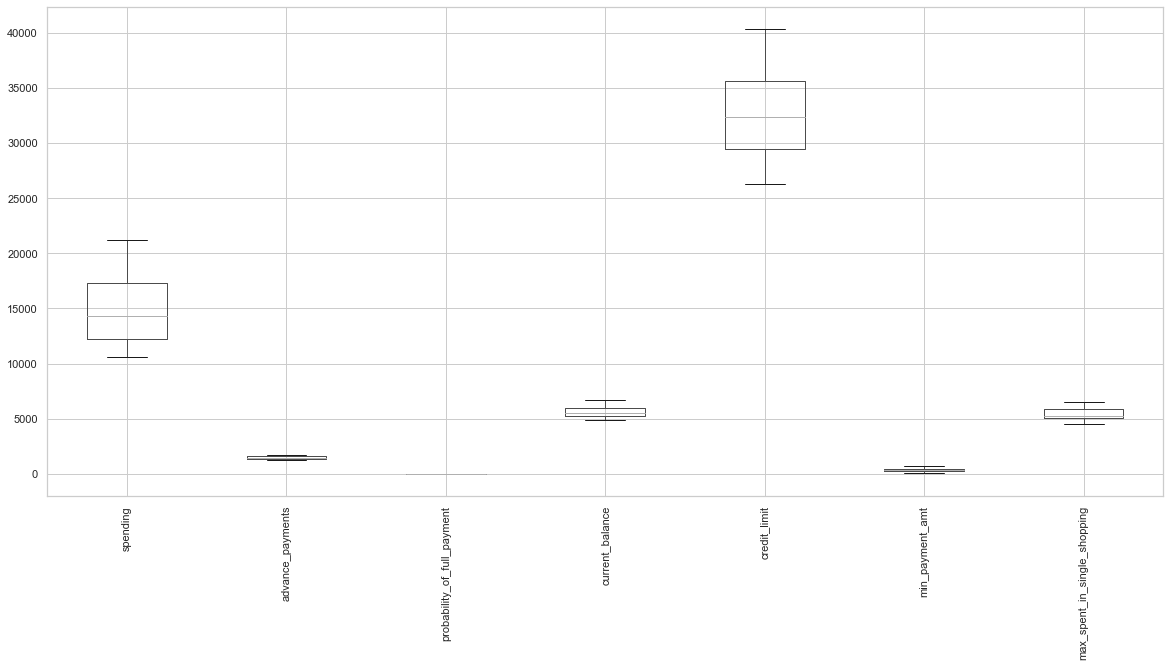

In [32]:
df_data.boxplot(figsize=(20,9))
plt.xticks(rotation=90)
plt.show()

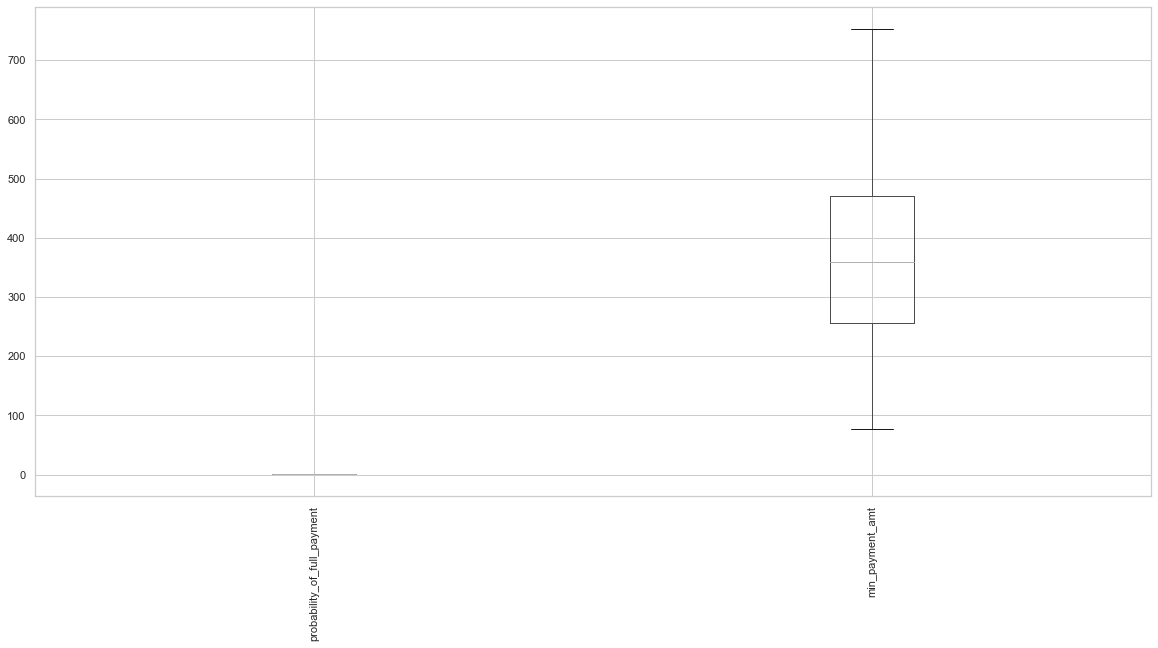

In [33]:
df_data.boxplot(figsize=(20,9),column=['probability_of_full_payment','min_payment_amt'])
plt.xticks(rotation=90)
plt.show()

In [34]:
df_data.probability_of_full_payment.mean()

0.8710250595238095

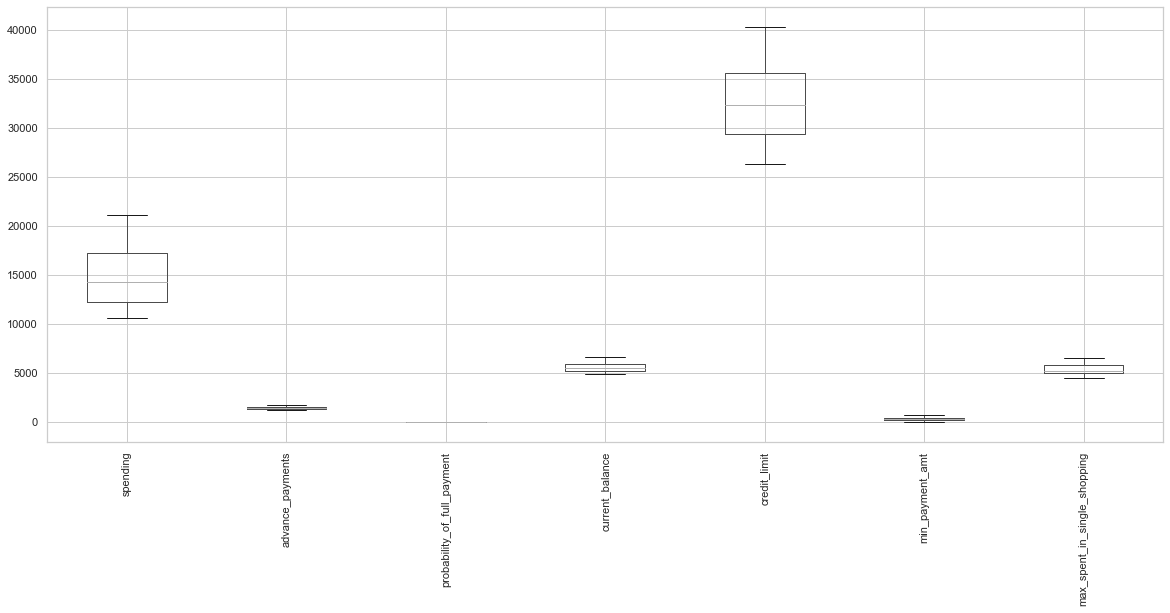

In [35]:
df_data.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [36]:
#df_data['probability_of_full_payment'] = df_data['probability_of_full_payment'].astype(float)
#df_data['probability_of_full_payment'] = pd.cut(x=df_data['probability_of_full_payment'], bins=[0,0.873450,100],
#                    labels=['1', '2'])

In [37]:
#df_data['probability_of_full_payment'].value_counts()

In [38]:
#df_num = df_data.drop(['probability_of_full_payment'], axis=1)
df_num = df_data

<h5>
1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.
</h5>

In [39]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.282644,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.223815,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.201404,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,1.069019,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.111851,0.874813


<AxesSubplot:>

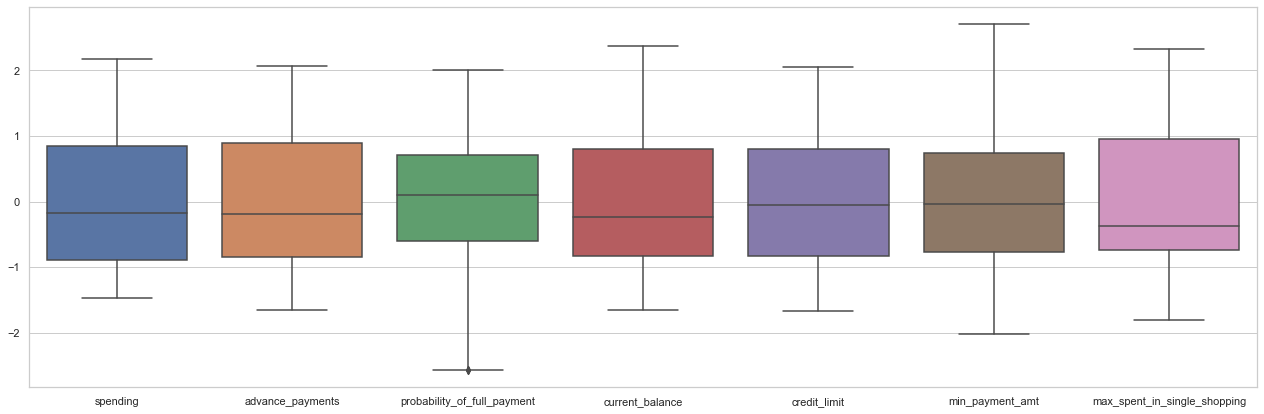

In [40]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(data=df_num_scaled)

<h5>
1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.
    </h5>

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [42]:
wardlink = linkage(df_num_scaled, method = 'ward')

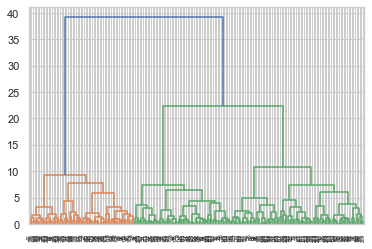

In [43]:
dend = dendrogram(wardlink)



In [44]:
print(dend['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2

In [45]:
unique_colors = set(dend['color_list'])
print(unique_colors)

{'C2', 'C0', 'C1'}


In [46]:
optimum_num_of_clusters = len(unique_colors)-1
print(optimum_num_of_clusters)

2


In [47]:
from scipy.cluster.hierarchy import fcluster

In [48]:
#Method 1

clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2], dtype=int32)

In [49]:
df_num['clusters'] = clusters

In [50]:
df_num.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19940.0,1692.0,0.875200,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.906400,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.882900,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.810588,5278.0,26410.0,518.2,5185.0,2
4,17990.0,1586.0,0.899200,5890.0,36940.0,206.8,5837.0,1


In [51]:
df_num.clusters.value_counts().sort_index()

1     66
2    144
Name: clusters, dtype: int64

In [52]:
df_num_cluster1 = df_num[df_num['clusters'] == 1]
df_num_cluster2 = df_num[df_num['clusters'] == 2]

In [53]:
df_num_cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,66.0,18473.333333,1352.603567,15380.0000,17630.000000,18755.0000,19147.5000,21180.0000
advance_payments,66.0,1619.696970,57.580170,1486.0000,1586.000000,1624.5000,1658.5000,1725.0000
probability_of_full_payment,66.0,0.883680,0.014771,0.8452,0.873775,0.8823,0.8975,0.9108
current_balance,66.0,6178.742424,237.515429,5718.0000,6008.750000,6153.5000,6334.5000,6675.0000
credit_limit,66.0,36921.969697,1763.280352,32680.0000,35615.000000,37280.0000,38090.0000,40330.0000
min_payment_amt,66.0,370.739394,120.694270,147.2000,286.675000,368.4500,451.9750,668.2000
max_spent_in_single_shopping,66.0,6045.606061,227.912931,5528.0000,5879.250000,6010.0000,6194.7500,6550.0000
clusters,66.0,1.000000,0.000000,1.0000,1.000000,1.0000,1.0000,1.0000


In [54]:
df_num_cluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,144.0,13185.694444,1641.245754,10590.000000,11827.50000,12795.0000,14437.500000,17120.0000
advance_payments,144.0,1380.868056,73.266183,1241.000000,1321.75000,1367.0000,1439.250000,1555.0000
probability_of_full_payment,144.0,0.865225,0.024582,0.810588,0.84885,0.8663,0.884225,0.9183
current_balance,144.0,5376.354167,239.801009,4899.000000,5180.00000,5360.0000,5542.000000,6053.0000
credit_limit,144.0,30598.750000,2604.660931,26300.000000,28367.50000,30515.0000,32582.500000,36830.0000
min_payment_amt,144.0,363.183057,152.647094,76.510000,243.37500,355.9500,483.200000,752.4000
max_spent_in_single_shopping,144.0,5115.868056,236.338067,4519.000000,5000.00000,5104.0000,5239.000000,5879.0000
clusters,144.0,2.000000,0.000000,2.000000,2.00000,2.0000,2.000000,2.0000


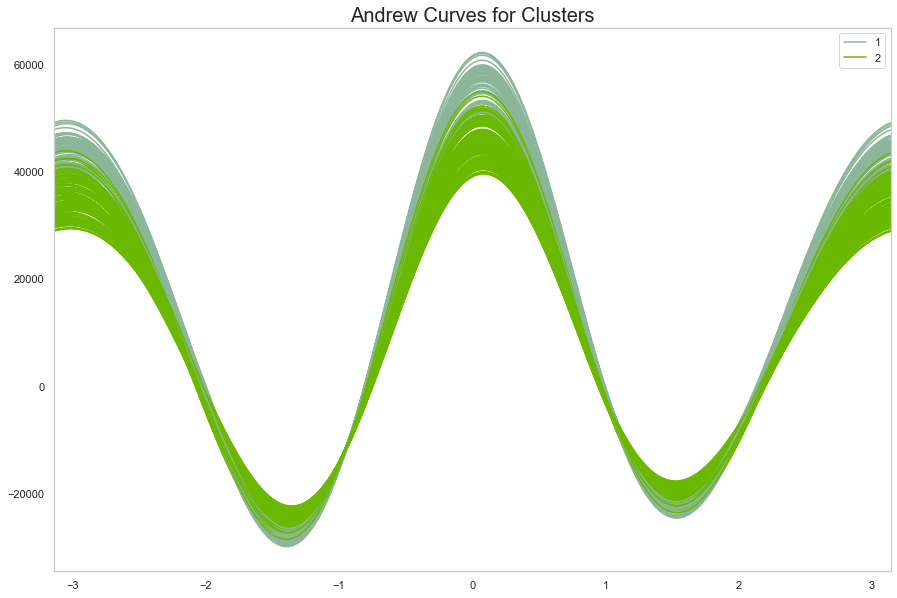

In [55]:
plt.rcParams['figure.figsize'] = (15, 10)

from pandas import plotting
plotting.andrews_curves(df_num, "clusters")
plt.title('Andrew Curves for Clusters', fontsize = 20)
plt.show()

<h5>
Cluster1: This segment consists of customers with less credit card usage........
          average monthly usage is 12359.029126................
          credit limit ranges from 26300.00 to 32320.0................
          in single shopping they spend between 4519.00 and 5491.0
    
Cluster2: This segment consists of customers with more credit card usage.........
          average monthly usage is 17242.990654..............
          credit limit ranges from 32120.00 to 40330.0..............
          in single shopping they spend between 4649.00 and 6550.0
</h5>

In [56]:
df_num.to_csv('cc.csv')

<h5>
1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.
</h5>

In [57]:
#df_num = df_data.drop(['probability_of_full_payment'], axis=1)
df_num = df_data

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
X = StandardScaler()

In [60]:
scaled_df = X.fit_transform(df_num)

In [61]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.177628  , ..., -0.28264406,
         2.3289982 , -1.47709789],
       [ 0.39358228,  0.25383997,  1.50507052, ..., -0.22381519,
        -0.53858174,  0.6770032 ],
       [ 1.41330028,  1.42819249,  0.505234  , ..., -0.20140419,
         1.50910692, -1.47709789],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -1.3576717 ,
        -0.83023461,  0.6770032 ],
       [ 0.43836719,  0.33827054,  1.23277462, ..., -0.97038161,
         0.07123789,  0.6770032 ],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.71125443,
         0.96047321,  0.6770032 ]])

In [62]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 2)

In [63]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [64]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [65]:
k_means.inertia_

689.9143787997622

In [66]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

435.98348962964315

In [67]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

689.9143787997622

In [68]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

C:\Users\athisya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1680.0

In [69]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

376.1027544056488

In [70]:
wss =[]

In [71]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

C:\Users\athisya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [72]:
wss

[1680.0,
 689.9143787997622,
 435.98348962964315,
 376.17561135843664,
 327.49496411662705,
 298.86026053997864,
 272.49562891316054,
 251.56498473507494,
 228.3807299043759,
 208.8278971605587]

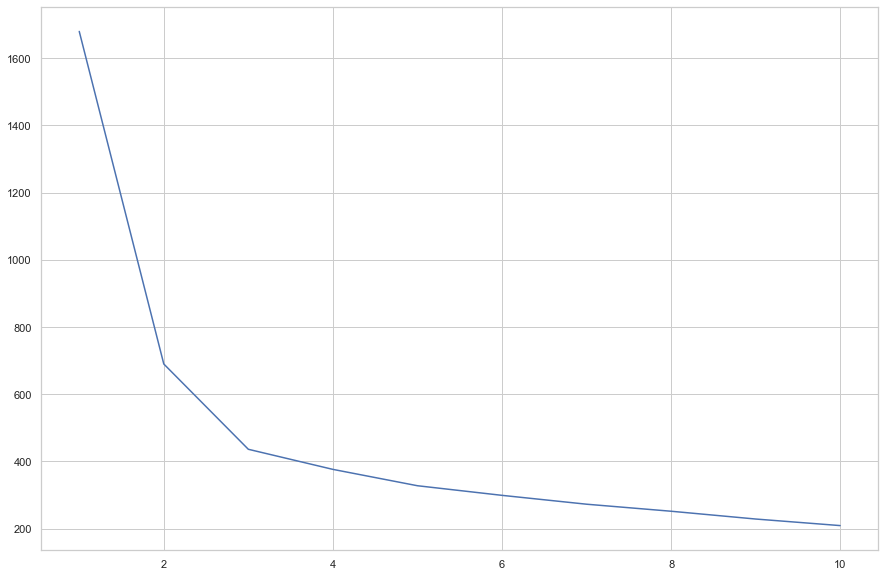

In [73]:
plt.plot(range(1,11), wss)

In [74]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [75]:
df_data["Clus_kmeans"] = labels
df_data.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19940.0,1692.0,0.875200,6675.0,37630.0,325.2,6550.0,1,1
1,15990.0,1489.0,0.906400,5363.0,35820.0,333.6,5144.0,2,0
2,18950.0,1642.0,0.882900,6248.0,37550.0,336.8,6148.0,1,1
3,10830.0,1296.0,0.810588,5278.0,26410.0,518.2,5185.0,2,2
4,17990.0,1586.0,0.899200,5890.0,36940.0,206.8,5837.0,1,1


In [76]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [77]:
silhouette_score(scaled_df,labels)

0.4380280576697396

In [78]:
sil_width = silhouette_samples(scaled_df,labels)

In [79]:
df_data["sil_width"] = sil_width
df_data.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans,sil_width
0,19940.0,1692.0,0.875200,6675.0,37630.0,325.2,6550.0,1,1,0.605504
1,15990.0,1489.0,0.906400,5363.0,35820.0,333.6,5144.0,2,0,0.469093
2,18950.0,1642.0,0.882900,6248.0,37550.0,336.8,6148.0,1,1,0.677285
3,10830.0,1296.0,0.810588,5278.0,26410.0,518.2,5185.0,2,2,0.539176
4,17990.0,1586.0,0.899200,5890.0,36940.0,206.8,5837.0,1,1,0.459802


In [80]:
silhouette_samples(scaled_df,labels).min()

-0.017527836108082357

In [81]:
df_data.Clus_kmeans.value_counts()

0    75
2    69
1    66
Name: Clus_kmeans, dtype: int64

<h5>
1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable
</h5>

In [82]:
df_num_kmeanscluster1 = df_data[df_data['Clus_kmeans'] == 0]
df_num_kmeanscluster2 = df_data[df_data['Clus_kmeans'] == 1]
df_num_kmeanscluster3 = df_data[df_data['Clus_kmeans'] == 2]
#df_num_kmeanscluster4 = df_data[df_data['Clus_kmeans'] == 3]

In [83]:
df_num_kmeanscluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,75.0,14428.933333,1218.864750,11230.000000,13760.000000,14380.000000,15260.000000,17120.000000
advance_payments,75.0,1432.413333,60.173868,1263.000000,1398.000000,1437.000000,1476.000000,1555.000000
probability_of_full_payment,75.0,0.882297,0.015398,0.852700,0.872300,0.882300,0.893350,0.918300
current_balance,75.0,5504.400000,242.244906,4902.000000,5357.000000,5527.000000,5689.500000,6053.000000
credit_limit,75.0,32620.933333,1703.307731,28790.000000,31540.000000,32450.000000,33810.000000,36830.000000
min_payment_amt,75.0,267.428803,111.742317,76.510000,198.400000,264.000000,327.400000,668.500000
max_spent_in_single_shopping,75.0,5121.600000,278.846029,4605.000000,4958.500000,5111.000000,5263.500000,5879.000000
clusters,75.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Clus_kmeans,75.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sil_width,75.0,0.348022,0.165401,-0.017528,0.251666,0.428814,0.477345,0.560447


In [84]:
df_num_kmeanscluster2.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,66.0,18473.333333,1352.603567,15380.000000,17630.000000,18755.000000,19147.50000,21180.000000
advance_payments,66.0,1619.696970,57.580170,1486.000000,1586.000000,1624.500000,1658.50000,1725.000000
probability_of_full_payment,66.0,0.883680,0.014771,0.845200,0.873775,0.882300,0.89750,0.910800
current_balance,66.0,6178.742424,237.515429,5718.000000,6008.750000,6153.500000,6334.50000,6675.000000
credit_limit,66.0,36921.969697,1763.280352,32680.000000,35615.000000,37280.000000,38090.00000,40330.000000
min_payment_amt,66.0,370.739394,120.694270,147.200000,286.675000,368.450000,451.97500,668.200000
max_spent_in_single_shopping,66.0,6045.606061,227.912931,5528.000000,5879.250000,6010.000000,6194.75000,6550.000000
clusters,66.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000
Clus_kmeans,66.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000
sil_width,66.0,0.546538,0.104133,0.220786,0.511457,0.573379,0.61697,0.677285


In [85]:
df_num_kmeanscluster3.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,69.0,11834.347826,700.145948,10590.000000,11260.000000,11820.000000,12370.000000,13340.000000
advance_payments,69.0,1324.840580,35.105565,1241.000000,1300.000000,1323.000000,1347.000000,1395.000000
probability_of_full_payment,69.0,0.846668,0.018489,0.810588,0.833500,0.848000,0.859600,0.886000
current_balance,69.0,5237.173913,139.027394,4899.000000,5140.000000,5226.000000,5350.000000,5541.000000
credit_limit,69.0,28400.724638,1302.730525,26300.000000,27190.000000,28330.000000,29600.000000,31260.000000
min_payment_amt,69.0,467.263768,119.616062,150.200000,404.800000,477.300000,539.800000,752.400000
max_spent_in_single_shopping,69.0,5109.637681,181.024127,4519.000000,5002.000000,5092.000000,5231.000000,5491.000000
clusters,69.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Clus_kmeans,69.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
sil_width,69.0,0.432069,0.152895,0.053272,0.349544,0.488517,0.539304,0.610518


In [86]:
df_data.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Clus_kmeans', 'sil_width'],
      dtype='object')

In [87]:
#sns.kdeplot(data=df_data, x="clusters", hue="Clus_kmeans", multiple="stack")

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


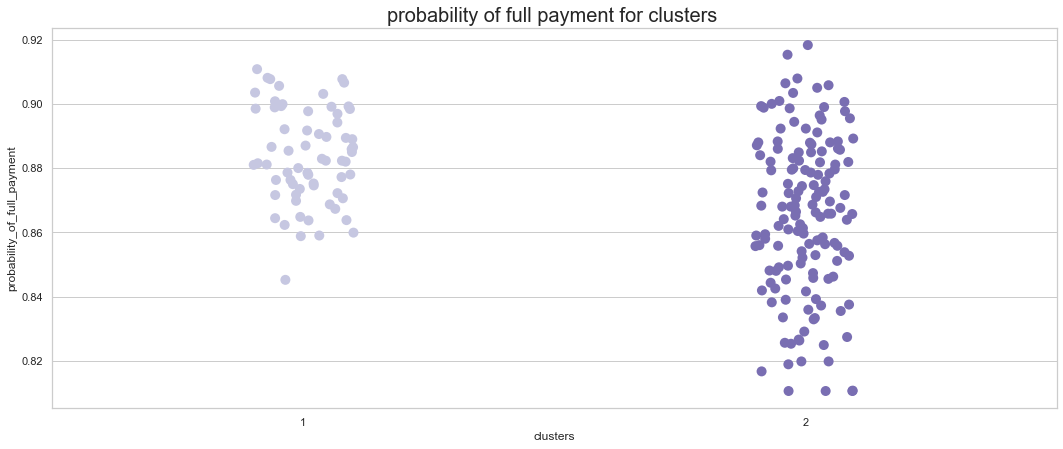

In [88]:

plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df_data['clusters'], df_data['probability_of_full_payment'], palette = 'Purples', size = 10)
plt.title('probability of full payment for clusters ', fontsize = 20)
plt.show()

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


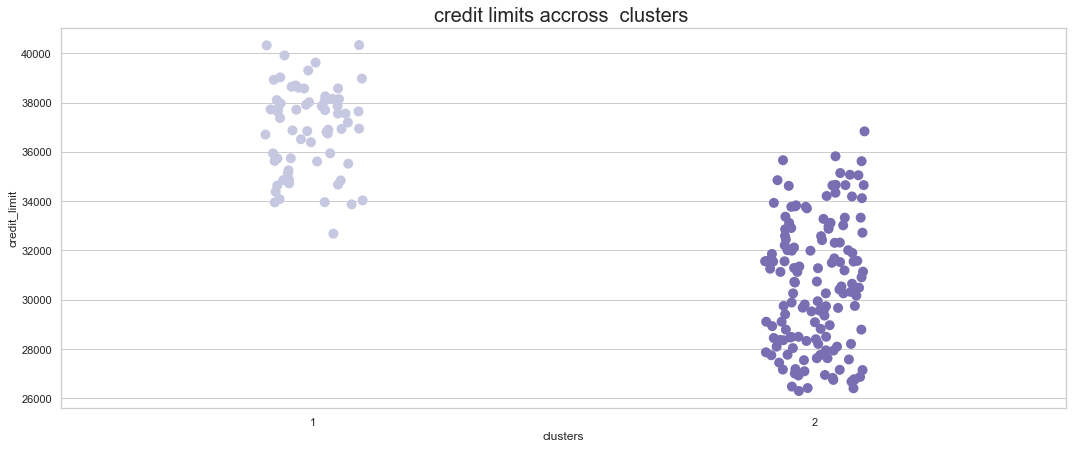

In [89]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df_data['clusters'], df_data['credit_limit'], palette = 'Purples', size = 10)
plt.title('credit limits accross  clusters ', fontsize = 20)
plt.show()

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


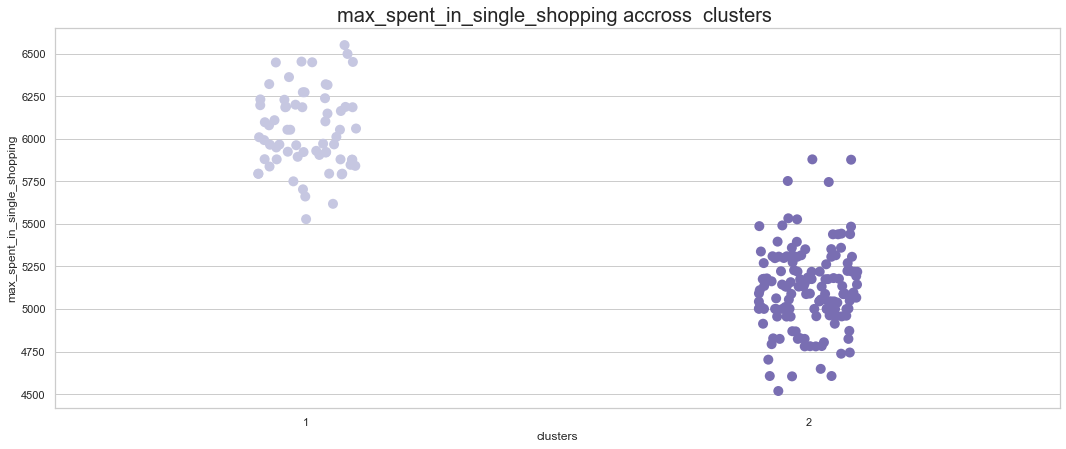

In [90]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df_data['clusters'], df_data['max_spent_in_single_shopping'], palette = 'Purples', size = 10)
plt.title('max_spent_in_single_shopping accross  clusters ', fontsize = 20)
plt.show()

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


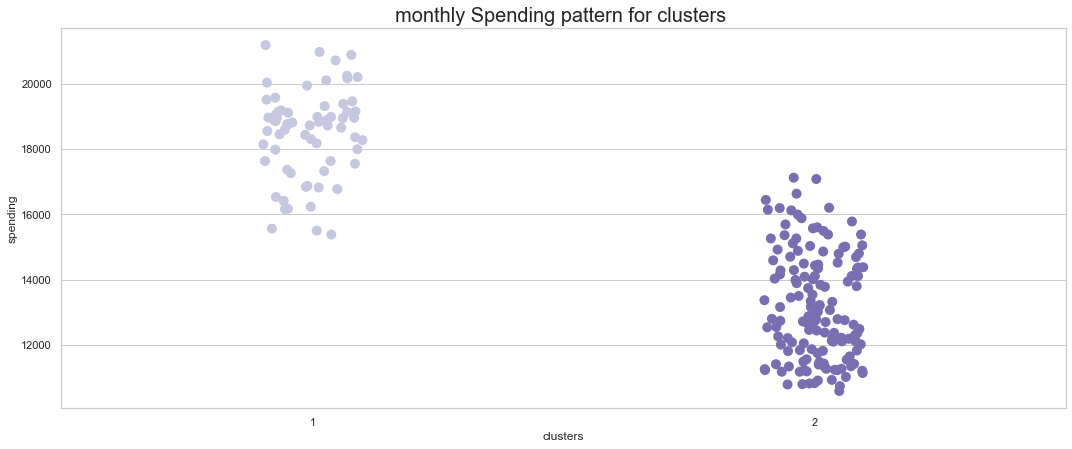

In [91]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df_data['clusters'], df_data['spending'], palette = 'Purples', size = 10)
plt.title('monthly Spending pattern for clusters ', fontsize = 20)
plt.show()

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


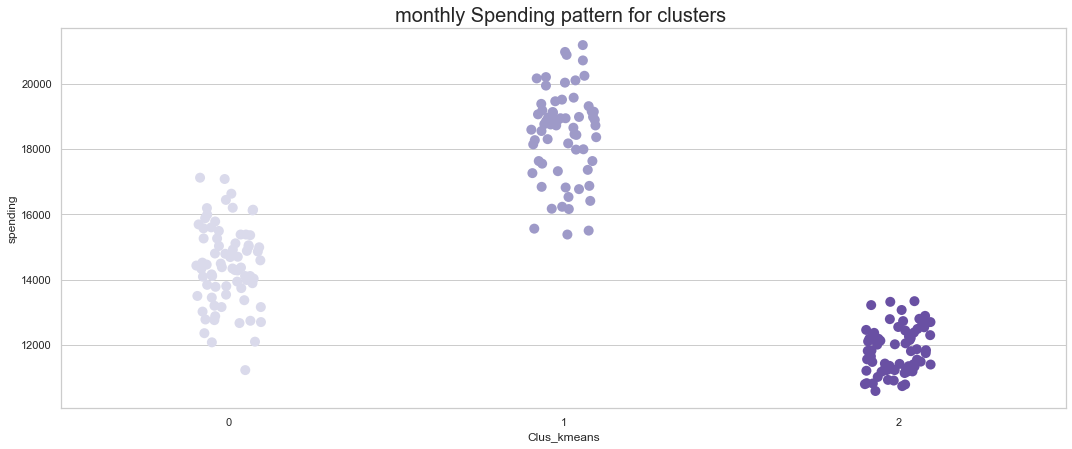

In [92]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df_data['Clus_kmeans'], df_data['spending'], palette = 'Purples', size = 10)
plt.title('monthly Spending pattern for clusters ', fontsize = 20)
plt.show()

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


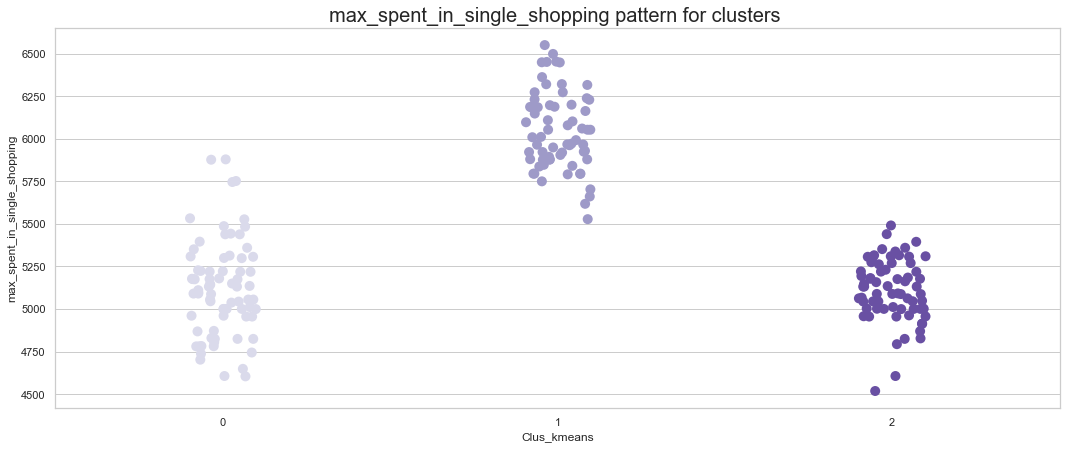

In [93]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df_data['Clus_kmeans'], df_data['max_spent_in_single_shopping'], palette = 'Purples', size = 10)
plt.title('max_spent_in_single_shopping pattern for clusters ', fontsize = 20)
plt.show()

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


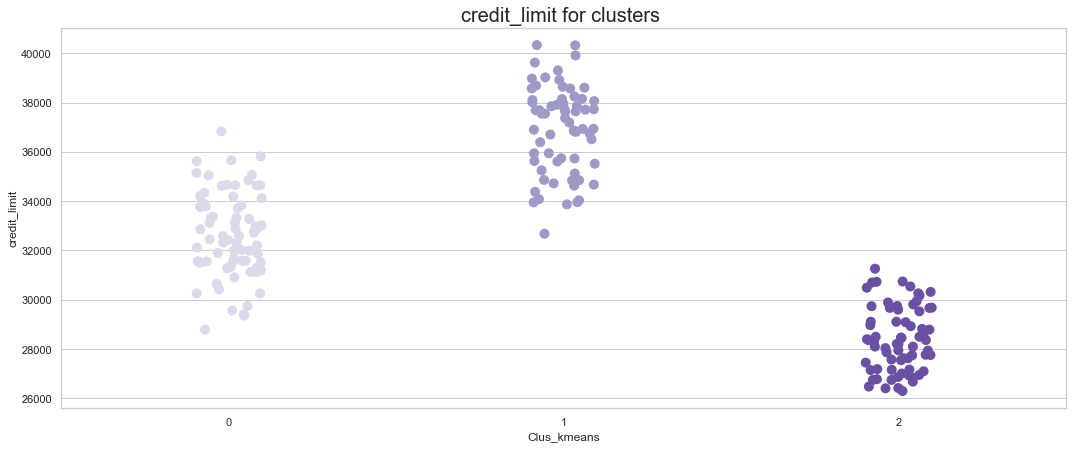

In [94]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df_data['Clus_kmeans'], df_data['credit_limit'], palette = 'Purples', size = 10)
plt.title('credit_limit for clusters ', fontsize = 20)
plt.show()

C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


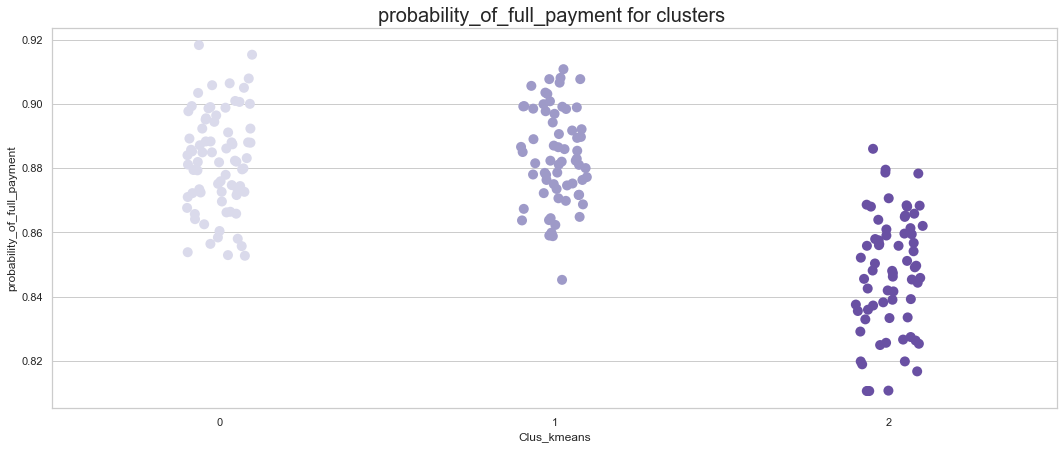

In [95]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df_data['Clus_kmeans'], df_data['probability_of_full_payment'], palette = 'Purples', size = 10)
plt.title('probability_of_full_payment for clusters ', fontsize = 20)
plt.show()

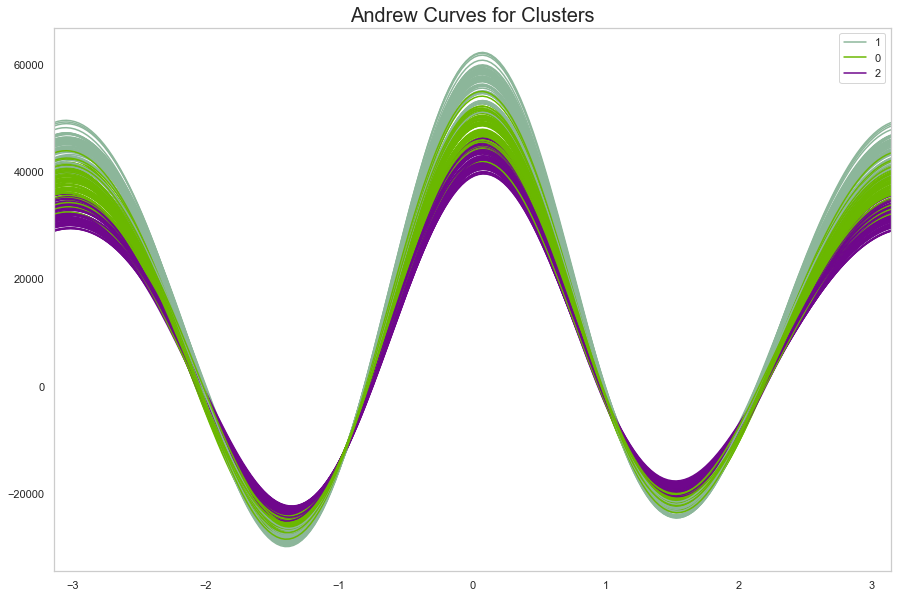

In [96]:
plt.rcParams['figure.figsize'] = (15, 10)

from pandas import plotting
plotting.andrews_curves(df_data, "Clus_kmeans")
plt.title('Andrew Curves for Clusters', fontsize = 20)
plt.show()

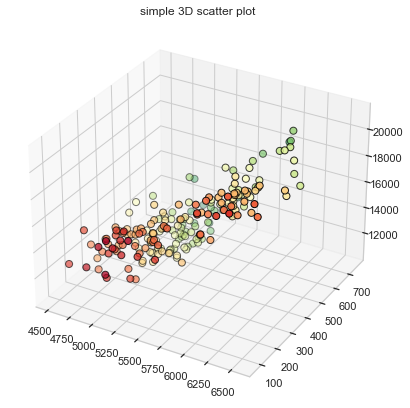

In [97]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
z = df_data['spending']
x = df_data['max_spent_in_single_shopping']
y = df_data['min_payment_amt']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x,y,z,c=y, cmap="RdYlGn", s=50, edgecolors="black")
#ax.scatter3D(y, color = "blue")
#ax.scatter3D(z, color = "red")
plt.title("simple 3D scatter plot")

# show plot
plt.show()



<h5>
Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

</h5>
<h5>

Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)
    
    </h5>

<h5>
2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.
</h5>

In [98]:
df_insurance = pd.read_csv("insurance_part2_data.csv")

In [99]:
df_insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [100]:
df_insurance.shape

(3000, 10)

In [101]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [102]:
df_insurance.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [103]:
df_insurance.Agency_Code.value_counts().sort_values()

JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64

In [104]:
#df_insurance[['Agency_Code', 'Claimed']].groupby(['Agency_Code', 'Claimed']).agg(['count'])
df_insurance.groupby(['Agency_Code', 'Claimed']).size().reset_index(name='counts')

,Agency_Code,Claimed,counts
0,C2B,No,364
1,C2B,Yes,560
2,CWT,No,331
3,CWT,Yes,141
4,EPX,No,1172
5,EPX,Yes,193
6,JZI,No,209
7,JZI,Yes,30


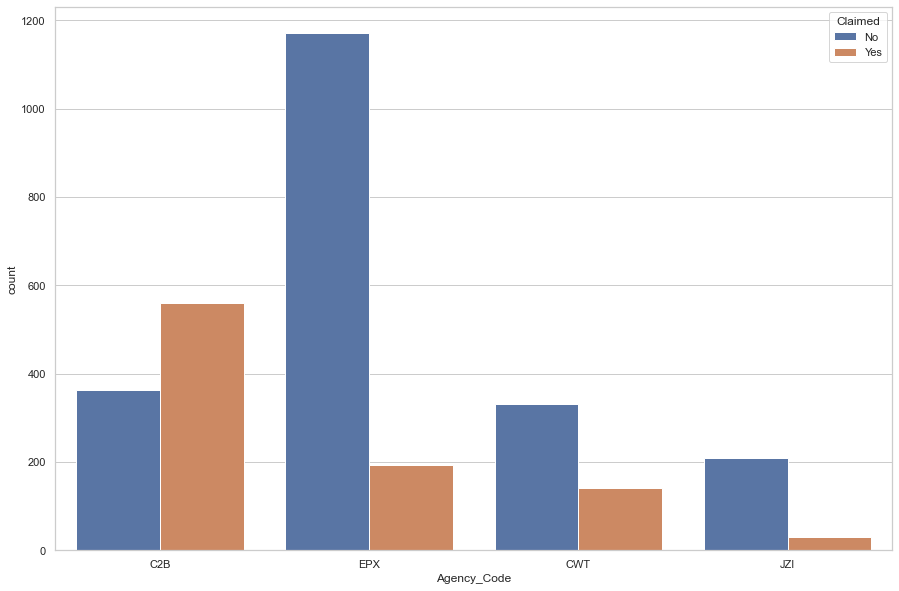

In [105]:
ax = sns.countplot(x="Agency_Code", hue="Claimed", data=df_insurance)

In [106]:
df_insurance.groupby(['Agency_Code','Claimed','Sales']).sum()

Age  Commision  Duration
Agency_Code Claimed Sales                           
C2B         No      0.00    110      31.71        58
                    0.19     96       0.10       363
                    0.32     48       0.09      4580
                    0.51     48       0.14         0
                    0.64     48       0.18        11
...                         ...        ...       ...
JZI         Yes     61.00    40      21.35        88
                    96.00    35      33.60       164
                    138.00  102      96.60        71
                    164.00   35      57.40       113
                    205.00   44       6.30        39

[680 rows x 3 columns]

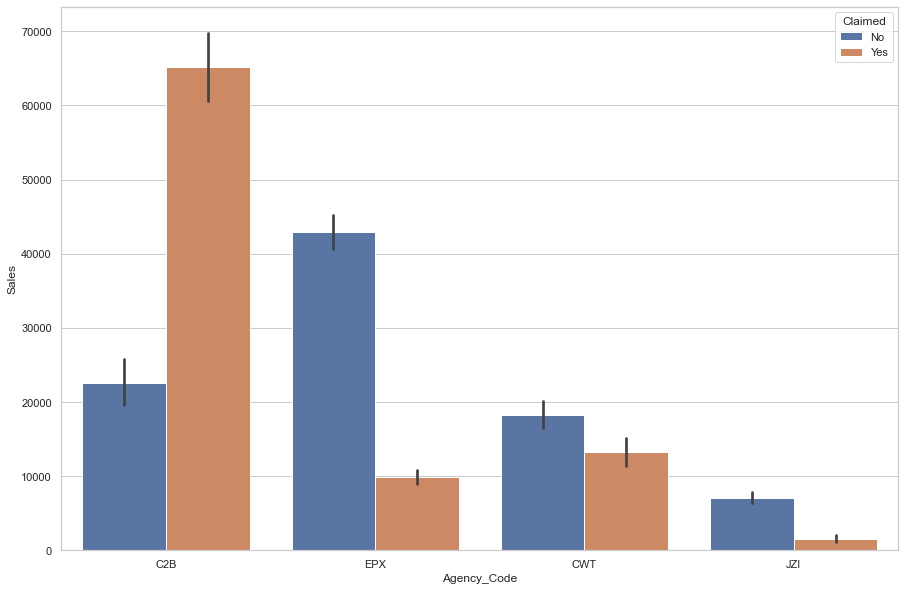

In [107]:
ax = sns.barplot(x="Agency_Code", y="Sales", hue="Claimed", data=df_insurance, estimator=sum)

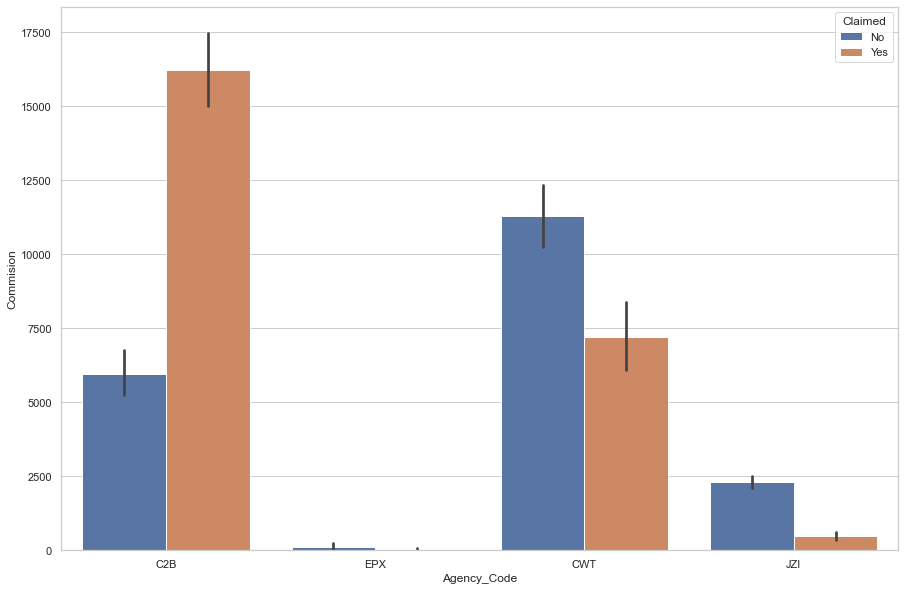

In [108]:
ax = sns.barplot(x="Agency_Code", y="Commision", hue="Claimed", data=df_insurance, estimator=sum)

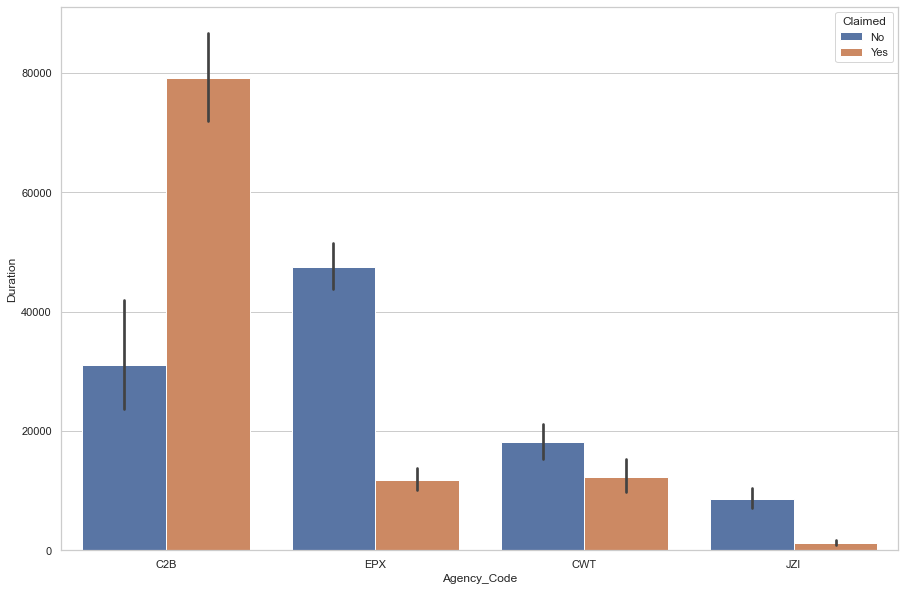

In [109]:
ax = sns.barplot(x="Agency_Code", y="Duration", hue="Claimed", data=df_insurance, estimator=sum)

In [110]:
df_insurance.Type.value_counts().sort_values()

Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64

In [111]:
df_insurance.groupby(['Type', 'Claimed']).size().reset_index(name='counts')

,Type,Claimed,counts
0,Airlines,No,573
1,Airlines,Yes,590
2,Travel Agency,No,1503
3,Travel Agency,Yes,334


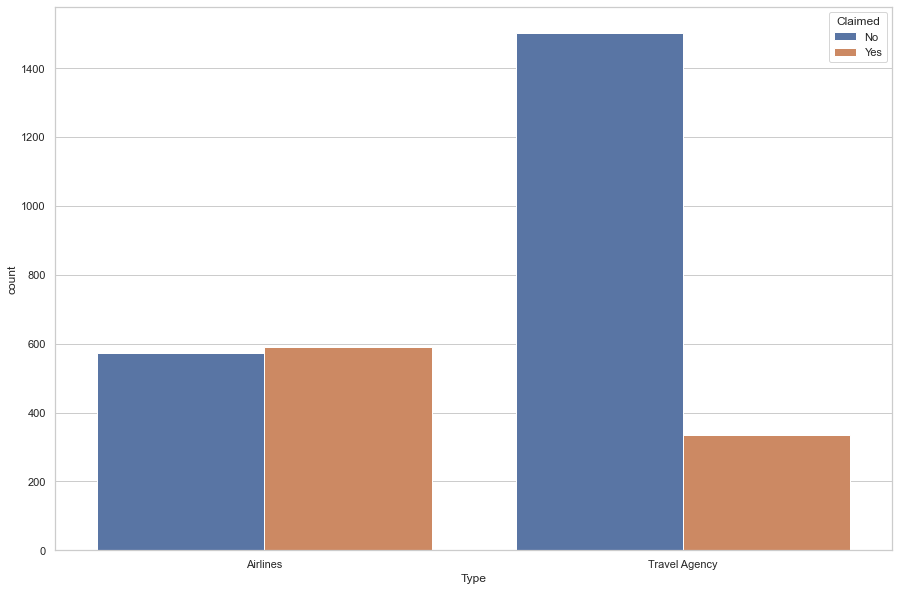

In [112]:
ax = sns.countplot(x="Type", hue="Claimed", data=df_insurance)

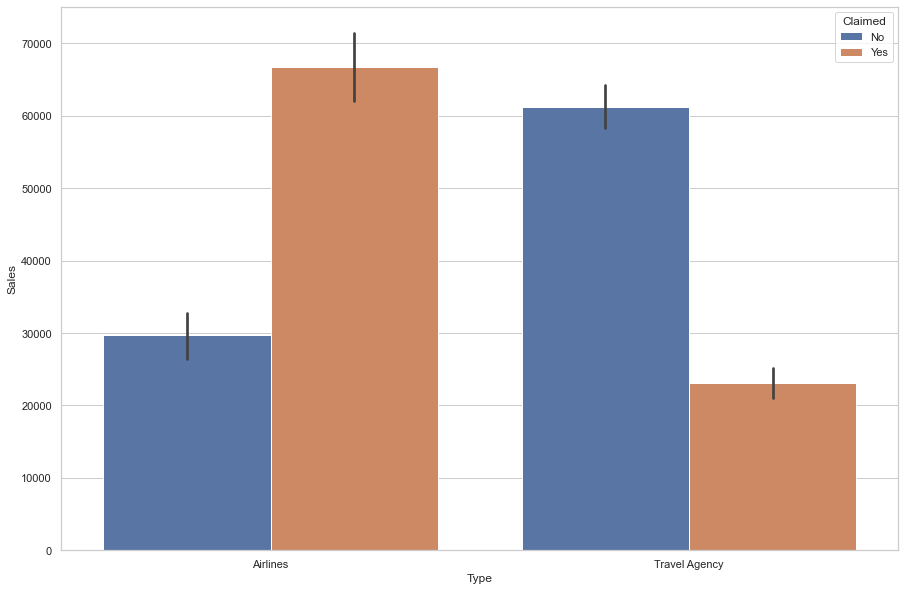

In [113]:
ax = sns.barplot(x="Type", y="Sales", hue="Claimed", data=df_insurance, estimator=sum)

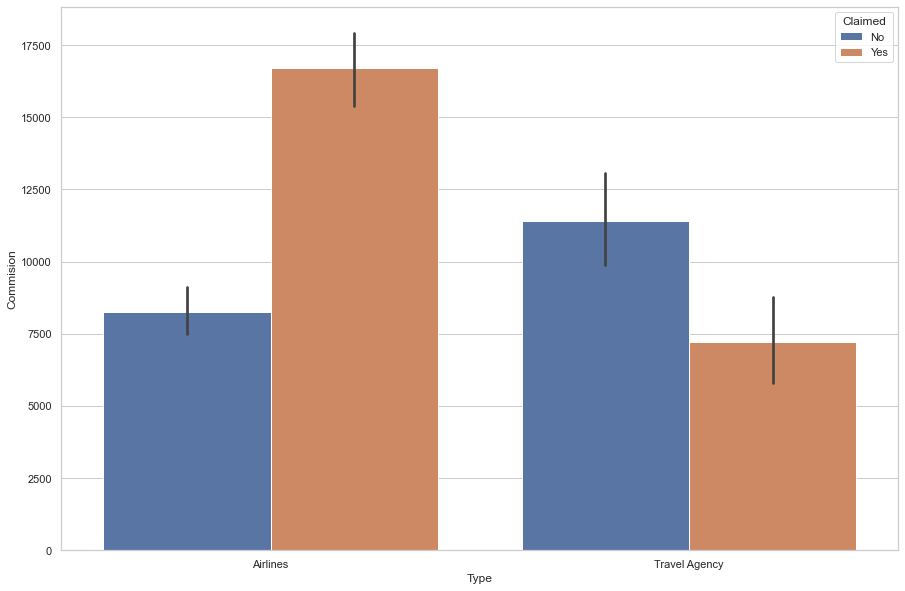

In [114]:
ax = sns.barplot(x="Type", y="Commision", hue="Claimed", data=df_insurance, estimator=sum)

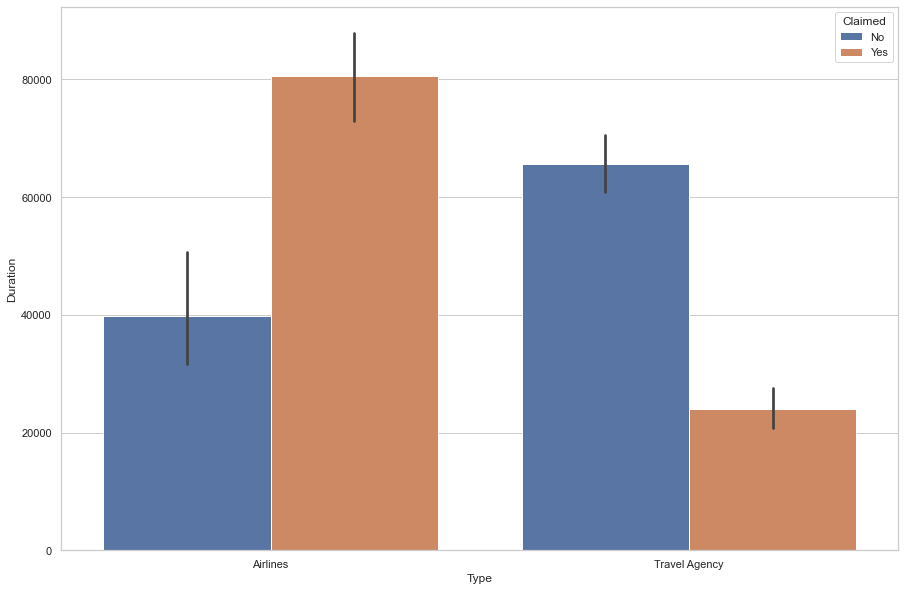

In [115]:
ax = sns.barplot(x="Type", y="Duration", hue="Claimed", data=df_insurance, estimator=sum)

In [116]:
df_insurance.Claimed.value_counts().sort_values()

Yes     924
No     2076
Name: Claimed, dtype: int64

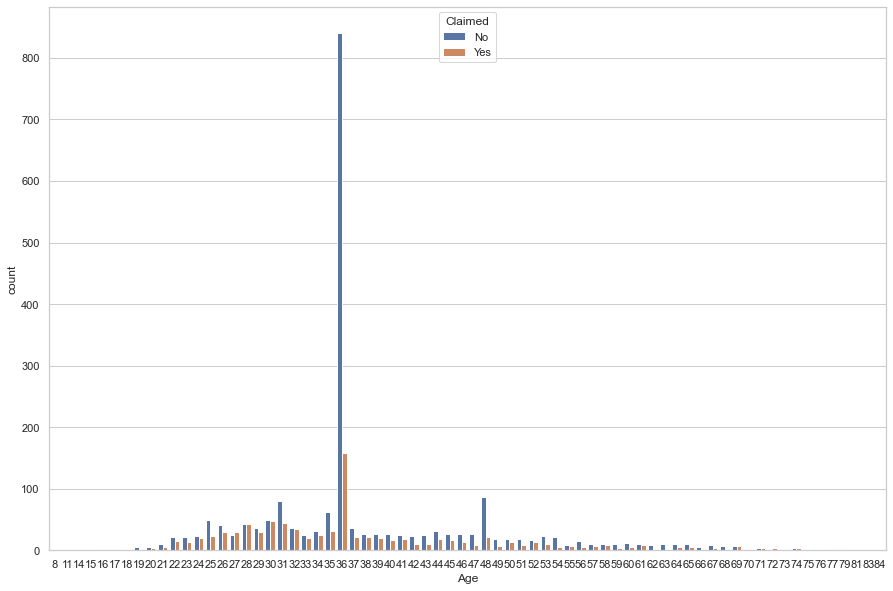

In [117]:
ax = sns.countplot(x="Age", hue="Claimed", data=df_insurance)

In [118]:
df_insurance.Channel.value_counts().sort_values()

Offline      46
Online     2954
Name: Channel, dtype: int64

In [119]:
df_insurance.groupby(['Channel', 'Claimed']).size().reset_index(name='counts')

,Channel,Claimed,counts
0,Offline,No,29
1,Offline,Yes,17
2,Online,No,2047
3,Online,Yes,907


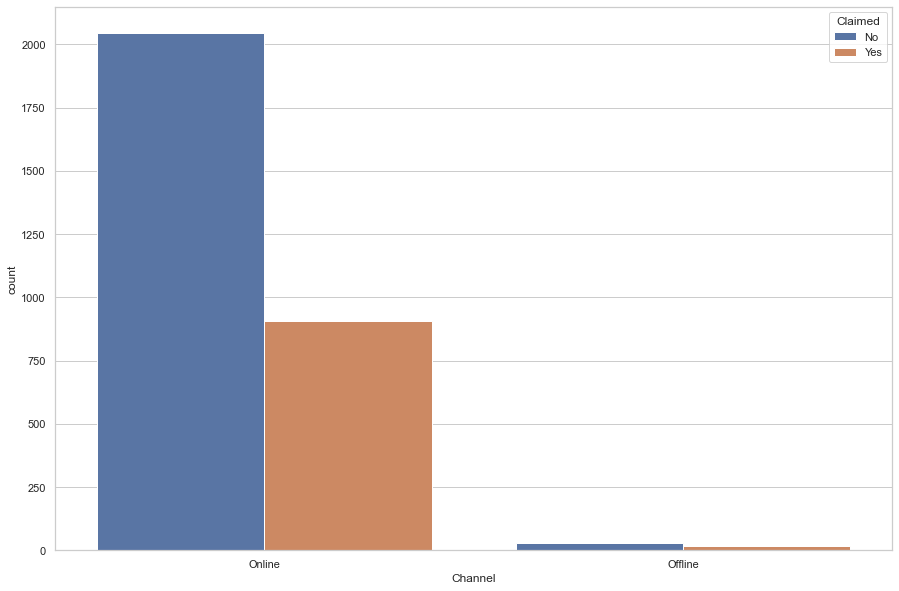

In [120]:
ax = sns.countplot(x="Channel", hue="Claimed", data=df_insurance)

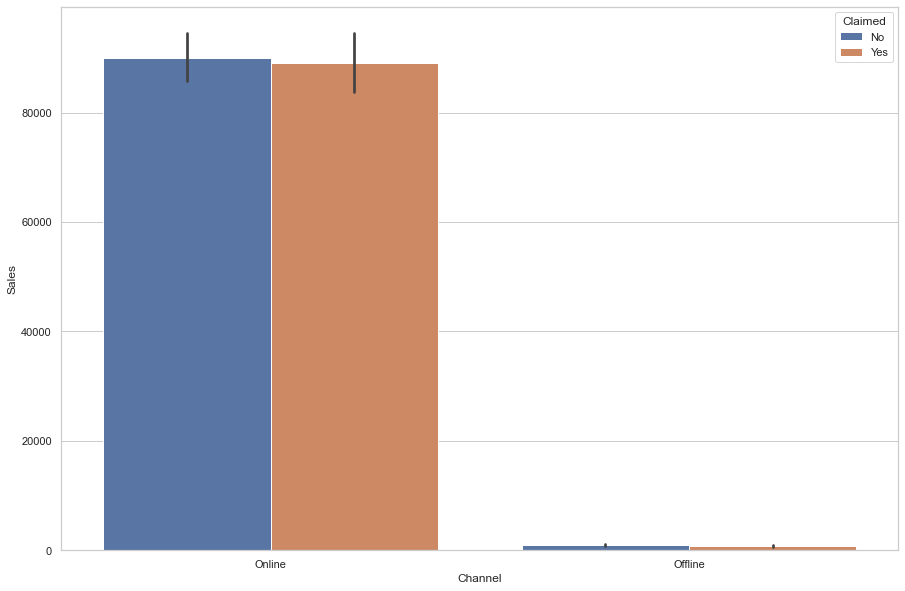

In [121]:
ax = sns.barplot(x="Channel", y="Sales", hue="Claimed", data=df_insurance, estimator=sum)

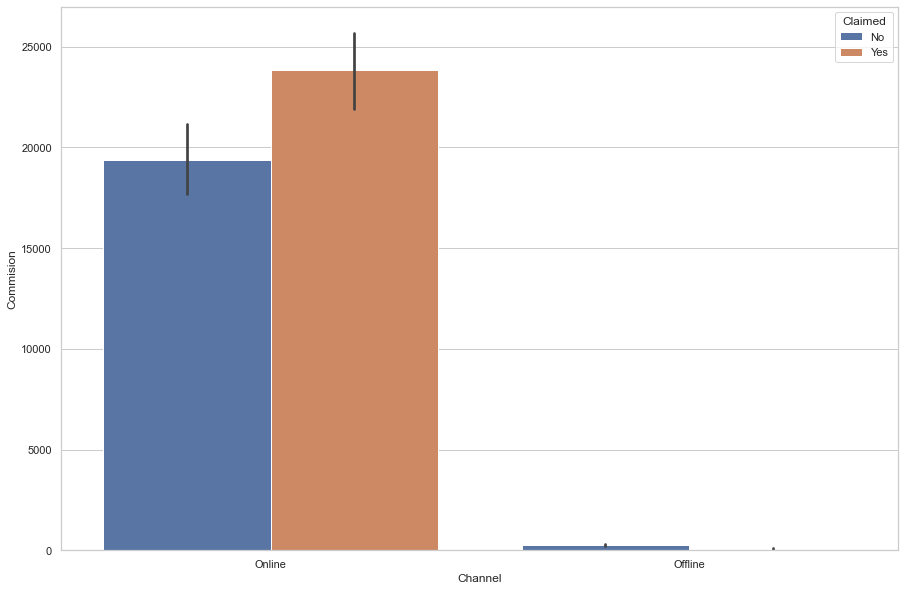

In [122]:
ax = sns.barplot(x="Channel", y="Commision", hue="Claimed", data=df_insurance, estimator=sum)

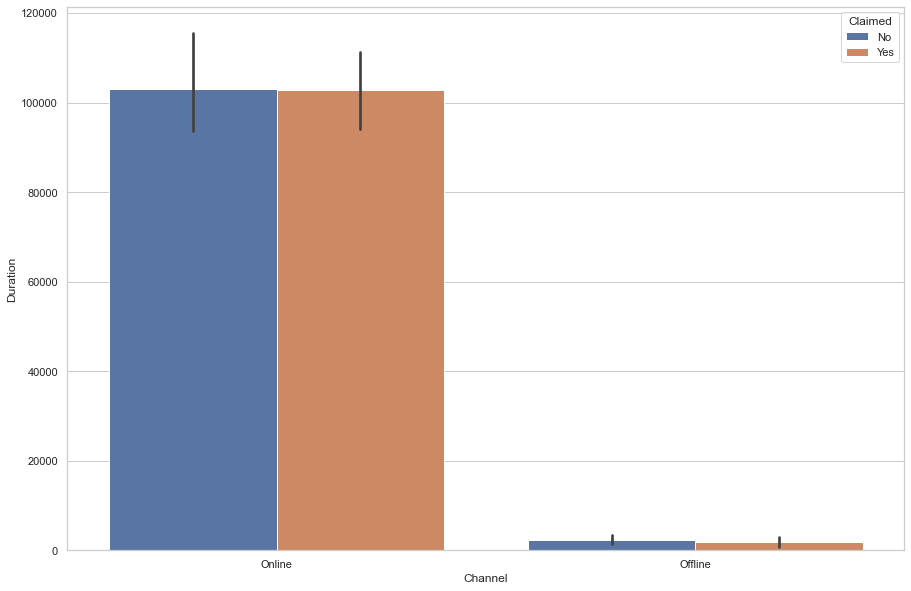

In [123]:

ax = sns.barplot(x="Channel", y="Duration", hue="Claimed", data=df_insurance, estimator=sum)

In [124]:
df_insurance["Product Name"].value_counts().sort_values()

Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64

In [125]:
df_insurance.groupby(['Product Name', 'Claimed']).size().reset_index(name='counts')

,Product Name,Claimed,counts
0,Bronze Plan,No,399
1,Bronze Plan,Yes,251
2,Cancellation Plan,No,635
3,Cancellation Plan,Yes,43
4,Customised Plan,No,882
5,Customised Plan,Yes,254
6,Gold Plan,No,39
7,Gold Plan,Yes,70
8,Silver Plan,No,121
9,Silver Plan,Yes,306


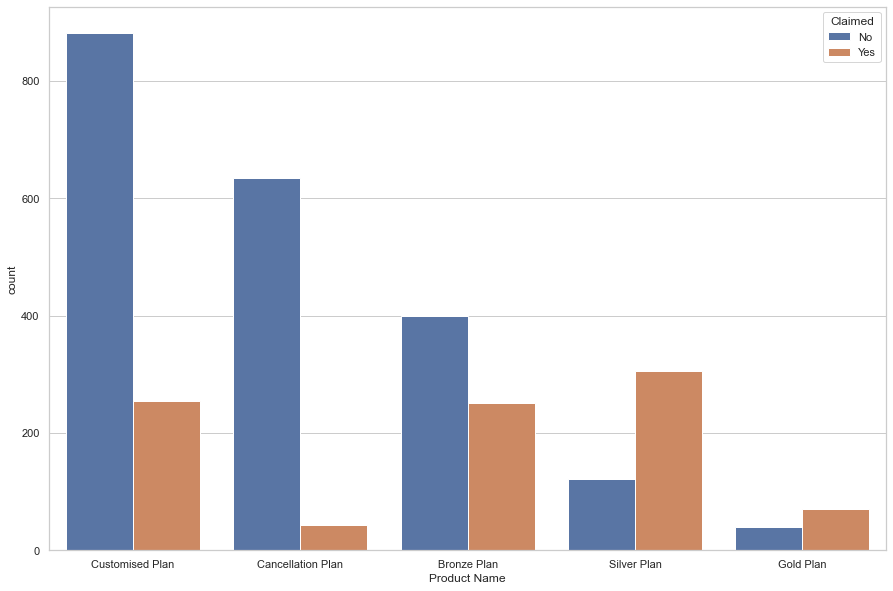

In [126]:
ax = sns.countplot(x="Product Name", hue="Claimed", data=df_insurance)

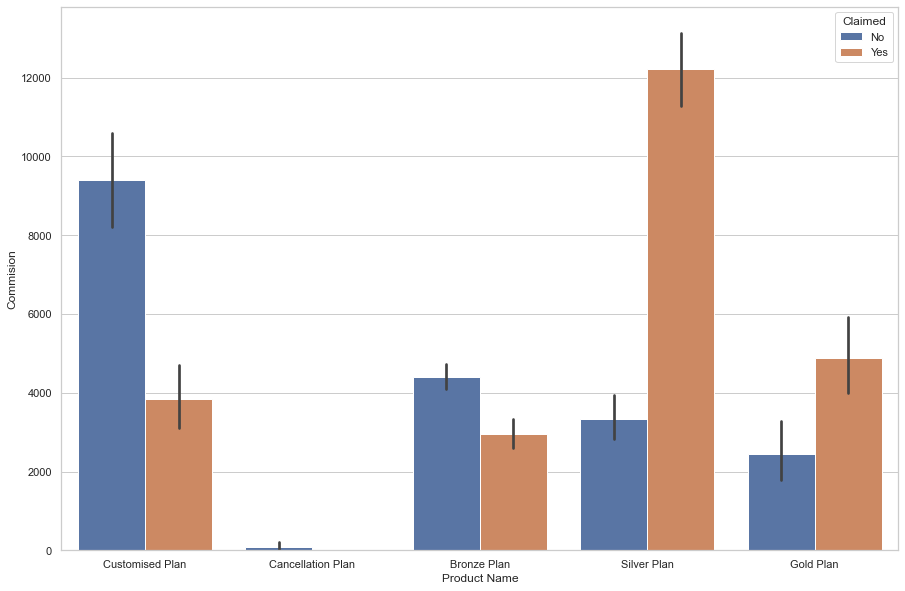

In [127]:
ax = sns.barplot(x="Product Name", y="Commision", hue="Claimed", data=df_insurance, estimator=sum)

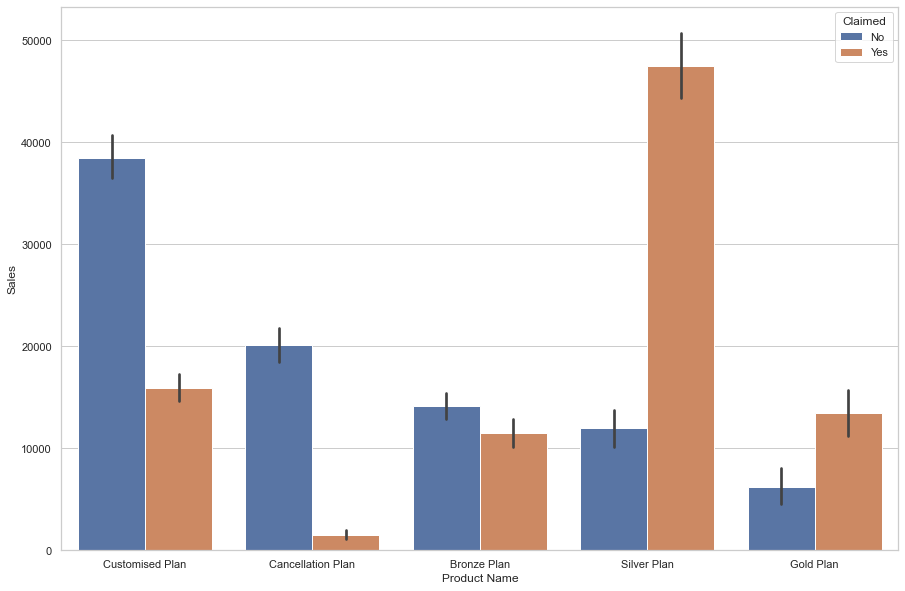

In [128]:
ax = sns.barplot(x="Product Name", y="Sales", hue="Claimed", data=df_insurance, estimator=sum)

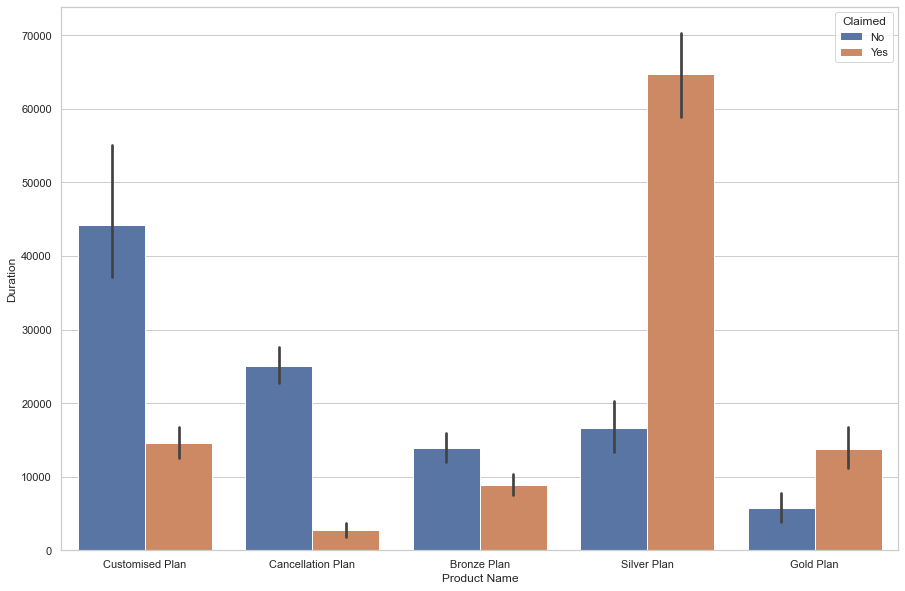

In [129]:
ax = sns.barplot(x="Product Name", y="Duration", hue="Claimed", data=df_insurance, estimator=sum)

In [130]:

df_insurance["Destination"].value_counts().sort_values()

EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64

In [131]:
df_insurance.groupby(['Destination', 'Claimed']).size().reset_index(name='counts')

,Destination,Claimed,counts
0,ASIA,No,1691
1,ASIA,Yes,774
2,Americas,No,232
3,Americas,Yes,88
4,EUROPE,No,153
5,EUROPE,Yes,62


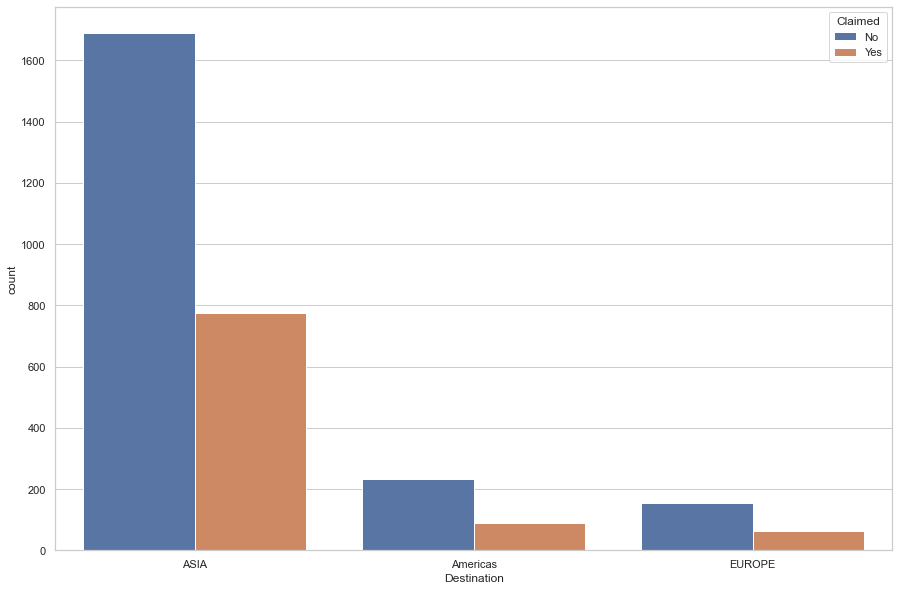

In [132]:
ax = sns.countplot(x="Destination", hue="Claimed", data=df_insurance)

In [133]:
df_insurance[df_insurance['Duration'] < 0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [134]:
df_insurance.Duration.replace(to_replace=-1, value=70.001333, inplace= True)

In [135]:
df_insurance.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.025000,60.249913
std,10.463518,25.481455,134.047041,70.733954
min,8.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,27.000000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [136]:
df_insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [137]:
df_insurance.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [138]:
# Are there any duplicates ?
dups = df_insurance.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_insurance[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27.0,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5.0,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11.0,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2.0,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5.0,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8.0,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10.0,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2.0,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4.0,20.0,Customised Plan,ASIA


# Removing Duplicates - Not removing them - no unique identifier, can be different customer.

Though it shows there are 139 records, but it can be of different customers, there is no customer ID or any unique identifier, so I am not dropping them off.

In [139]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_insurance[column].describe(),end=' ')
    
    
    plt.figure()
    sns.set(style = 'whitegrid')
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(data=df_insurance, x=df_insurance[column], kde=True)
    plt.show()
    
    plt.figure()
    sns.set(style = 'whitegrid')
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_insurance[column])

    plt.show()

In [140]:
df_num2 = df_insurance.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num2.columns.values)
len(lstnumericcolumns)

4

Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


<Figure size 1080x720 with 0 Axes>

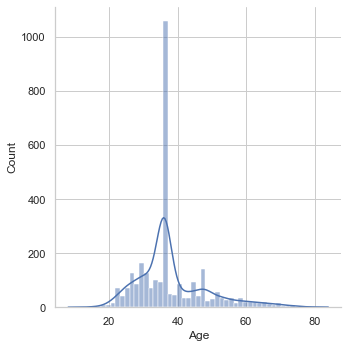

BoxPlot of Age
----------------------------------------------------------------------------


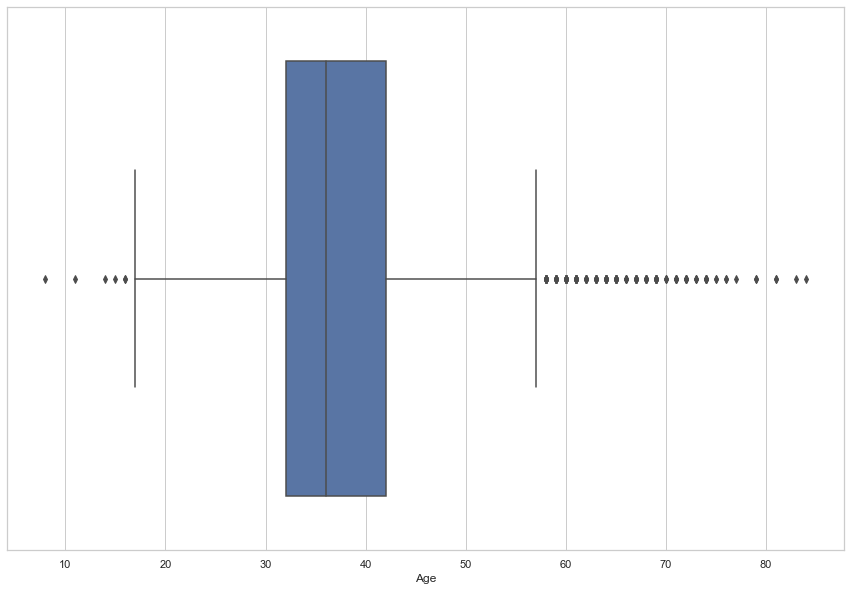

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


<Figure size 1080x720 with 0 Axes>

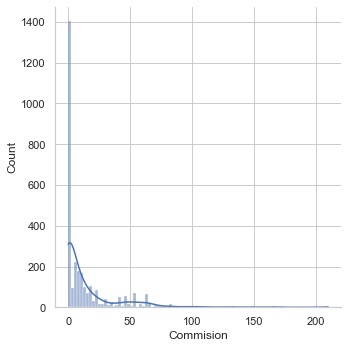

BoxPlot of Commision
----------------------------------------------------------------------------


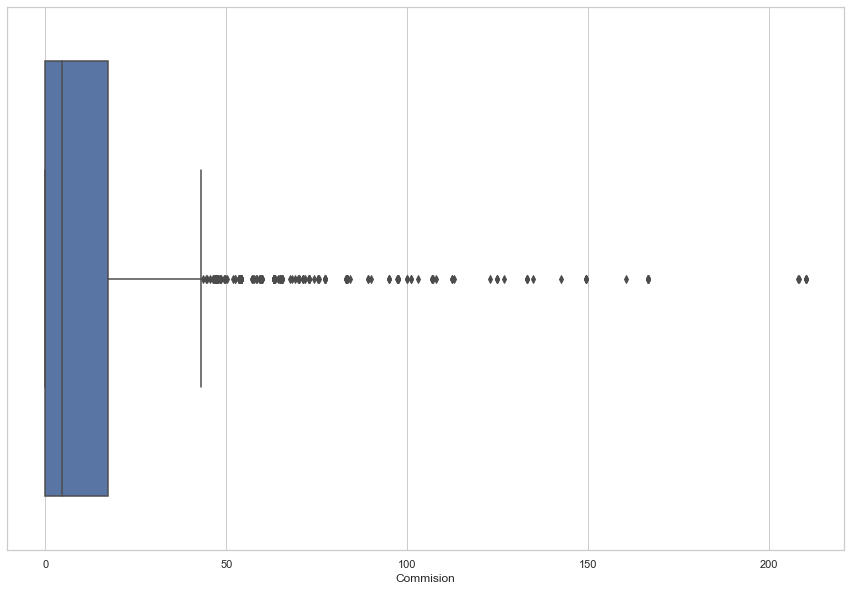

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       70.025000
std       134.047041
min         0.000000
25%        11.000000
50%        27.000000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


<Figure size 1080x720 with 0 Axes>

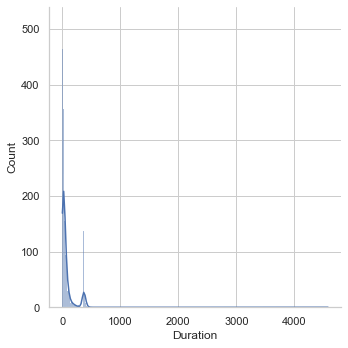

BoxPlot of Duration
----------------------------------------------------------------------------


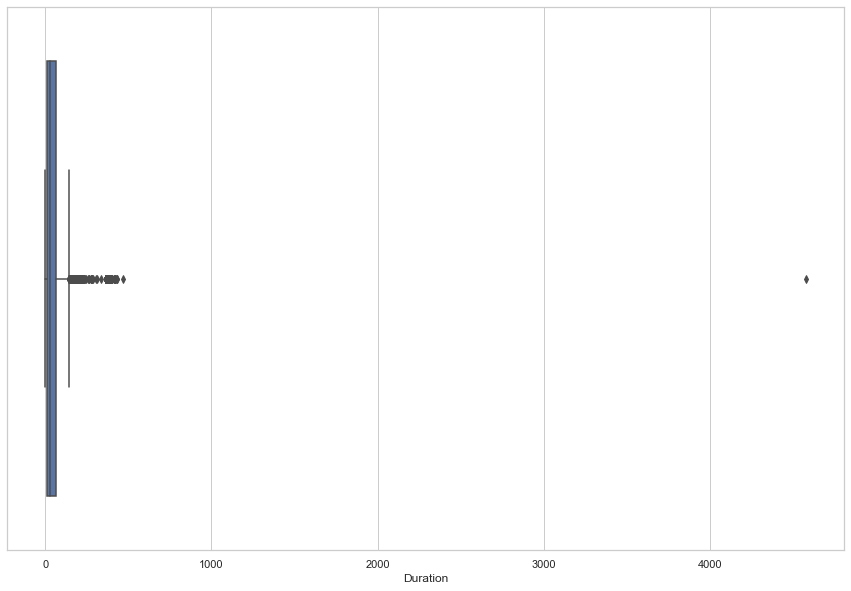

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


<Figure size 1080x720 with 0 Axes>

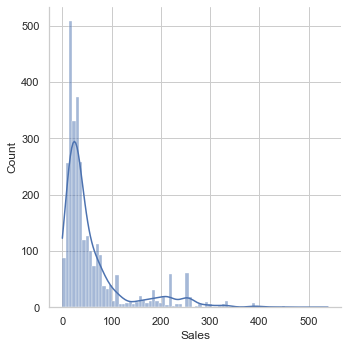

BoxPlot of Sales
----------------------------------------------------------------------------


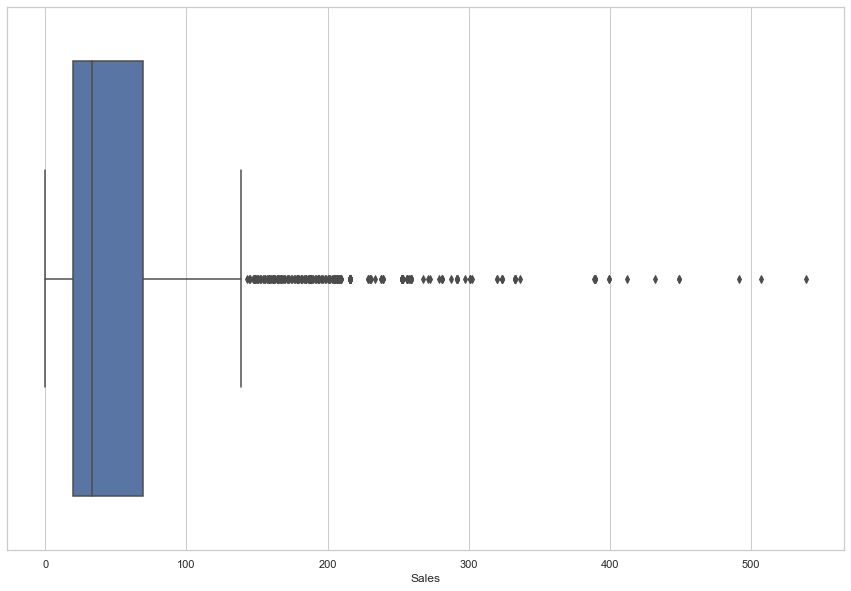

In [141]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [142]:
# skewness along the index axis
df_insurance.skew(axis = 0, skipna = True)

Age           1.149713
Commision     3.148858
Duration     13.786136
Sales         2.381148
dtype: float64

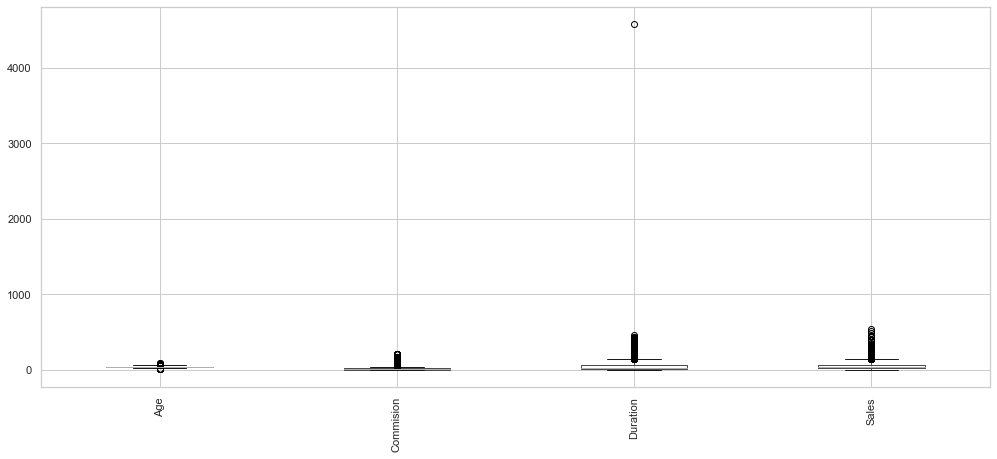

In [143]:
df_insurance.boxplot(figsize=(17,7),column=['Age','Commision','Duration','Sales'])
plt.xticks(rotation=90)
plt.show()



In [144]:
df_insurance['Destination'] = pd.Categorical(df_insurance['Destination']).codes

In [145]:
df_insurance['Product Name'] = pd.Categorical(df_insurance['Product Name']).codes

In [146]:
df_insurance['Channel'] = pd.Categorical(df_insurance['Channel']).codes

In [147]:
df_insurance['Claimed'] = pd.Categorical(df_insurance['Claimed']).codes

In [148]:
df_insurance['Type'] = pd.Categorical(df_insurance['Type']).codes

In [149]:
df_insurance['Agency_Code'] = pd.Categorical(df_insurance['Agency_Code']).codes

In [150]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(3), int64(1), int8(6)
memory usage: 111.5 KB


In [151]:

df_insurance.rename(columns={'Product Name': 'Product_Name'}, inplace=True)

In [152]:
df_insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48,0,0,0,0.70,1,7.0,2.51,2,0
1,36,2,1,0,0.00,1,34.0,20.00,2,0
2,39,1,1,0,5.94,1,3.0,9.90,2,1
3,36,2,1,0,0.00,1,4.0,26.00,1,0
4,33,3,0,0,6.30,1,53.0,18.00,0,0


In [153]:
no_outlier = ['Agency_Code','Type','Claimed','Channel','Product_Name','Destination']
outlier_list = [x for x in df_insurance.columns if x not in no_outlier]

In [154]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
#    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    mean_value = np.mean(x)
    median_value = np.median(x)
#    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q75 if y > upper_bound else y).apply(lambda y: q25 if y < lower_bound else y)

In [155]:
for i in df_insurance[outlier_list]:    
    df_insurance[i]=treat_outlier(df_insurance[i])

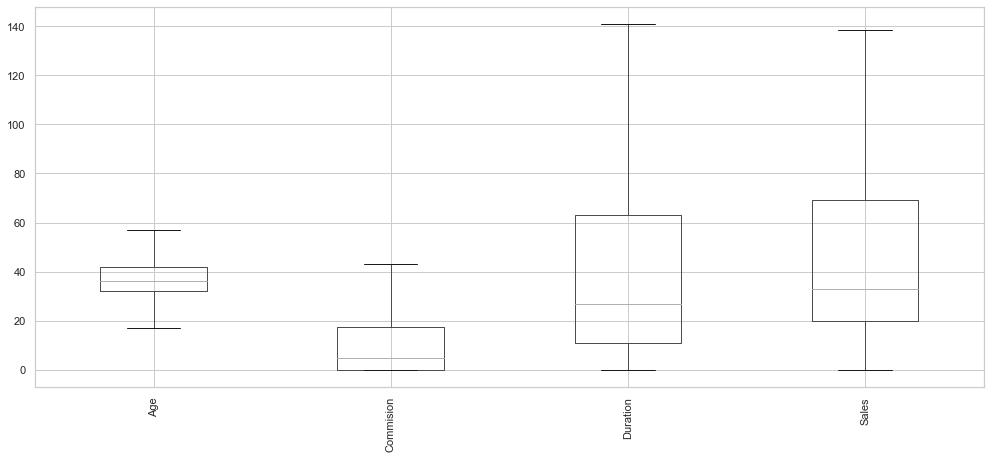

In [156]:
df_insurance.boxplot(figsize=(17,7),column=['Age','Commision','Duration','Sales'])
plt.xticks(rotation=90)
plt.show()

In [157]:
# skewness along the index axis
df_insurance.skew(axis = 0, skipna = True)

Age             0.347861
Agency_Code    -0.155126
Type           -0.461352
Claimed         0.832185
Commision       1.276352
Channel        -7.892734
Duration        0.975668
Sales           0.847980
Product_Name    0.432670
Destination     2.188556
dtype: float64

<h5>
2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.
</h5>

## Proportion of 1s and 0s

In [158]:
df_insurance.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [159]:
print(df_insurance.Claimed.value_counts())
print('%1s',924/(924+2076))
print('%0s',2076/(2076+924))

0    2076
1     924
Name: Claimed, dtype: int64
%1s 0.308
%0s 0.692


## Extracting the target column into separate vectors for training set and test set

In [160]:
X = df_insurance.drop("Claimed", axis=1)

y = df_insurance.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product_Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


## Splitting data into training and test set

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [162]:
train_labels.head()

1045    0
2717    0
2835    1
2913    1
959     0
Name: Claimed, dtype: int8

In [163]:
test_labels.head()

1957    0
2087    1
1394    1
1520    1
1098    0
Name: Claimed, dtype: int8

## Checking the dimensions of the training and test data

In [164]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)


X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


# Building a Decision Tree Classifier

In [165]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [5,10,20,30],
    'min_samples_leaf': [30,60,90], 
    'min_samples_split': [90,180,270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [166]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 180}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=180,
                       random_state=1)

## Generating Tree

In [167]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

## Variable Importance

In [168]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.576359
Sales         0.245968
Product_Name  0.073619
Duration      0.039874
Age           0.035360
Commision     0.021689
Type          0.007131
Channel       0.000000
Destination   0.000000


## Predicting on Training and Test dataset

In [169]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [170]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.935714,0.064286
1,0.658537,0.341463
2,0.344828,0.655172
3,0.137931,0.862069
4,0.927152,0.072848


## Model Evaluation

### AUC and ROC for the training data

AUC: 0.840


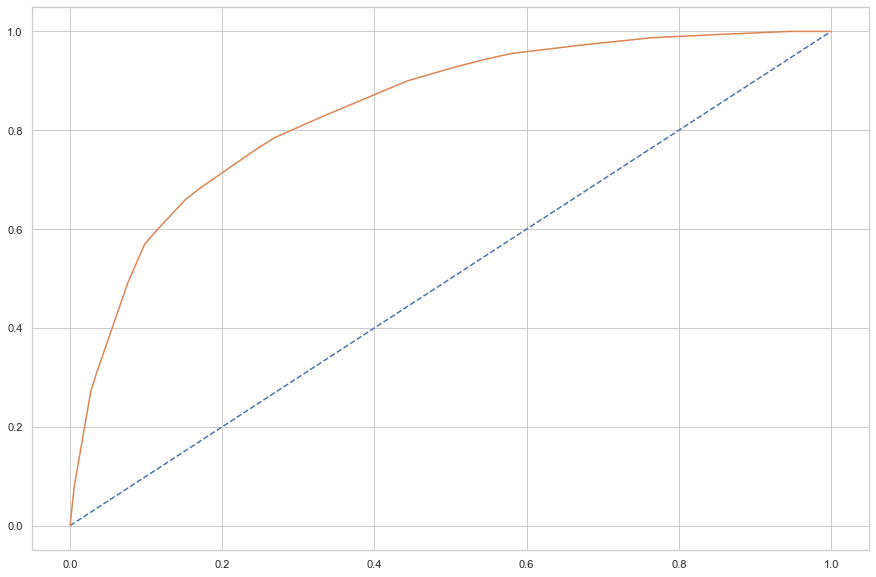

In [171]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.799


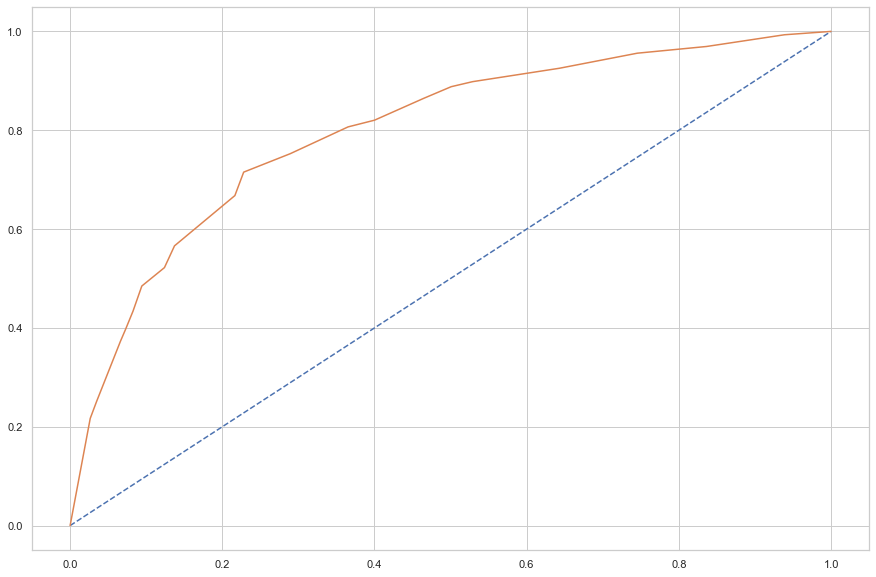

In [172]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [173]:
confusion_matrix(train_labels, ytrain_predict)

array([[1327,  144],
       [ 271,  358]], dtype=int64)

In [174]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.8023809523809524

In [175]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1471
           1       0.71      0.57      0.63       629

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.80      0.80      0.80      2100



In [176]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.71
cart_train_recall  0.57
cart_train_f1  0.63


### Confusion Matrix for test data

In [177]:
confusion_matrix(test_labels, ytest_predict)

array([[555,  50],
       [167, 128]], dtype=int64)

In [178]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7588888888888888

In [179]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.74      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



In [180]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.43
cart_test_f1  0.54


# Cart Conclusion

<b>Train Data:</b>  
    AUC: 83.4%        
    Accuracy: 80%  (0.7995238095238095)           
    Precision: 69%        
    f1-Score: 64%       
            
<b>Test Data:</b>      
    AUC: 80.3%      
    Accuracy: 77%   (0.7677777777777778)      
    Precision: 72%       
    f1-Score: 58%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Duration is the most important variable for predicting claim status

# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

In [181]:
param_grid = {
    'max_depth': [7, 10],## 20,30,40
    'max_features': [4, 6],## 7,8,9
    'min_samples_leaf': [30, 60],## 50,100
    'min_samples_split': [90, 180], ## 60,70
    'n_estimators': [301, 501] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [182]:
 grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [30, 60],
                         'min_samples_split': [90, 180],
                         'n_estimators': [301, 501]})

In [183]:
train_labels

1045    0
2717    0
2835    1
2913    1
959     0
       ..
2763    0
905     0
1096    0
235     0
1061    0
Name: Claimed, Length: 2100, dtype: int8

In [184]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 501}

In [185]:
best_grid = grid_search.best_estimator_

In [186]:
best_grid

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=30,
                       min_samples_split=90, n_estimators=501, random_state=1)

## Predicting the Training and Testing data

In [187]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [188]:
confusion_matrix(train_labels,ytrain_predict)

array([[1334,  137],
       [ 274,  355]], dtype=int64)

In [189]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8042857142857143

In [190]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1471
           1       0.72      0.56      0.63       629

    accuracy                           0.80      2100
   macro avg       0.78      0.74      0.75      2100
weighted avg       0.80      0.80      0.80      2100



In [191]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.56
rf_train_f1  0.63


Area under Curve is 0.8444646309844054


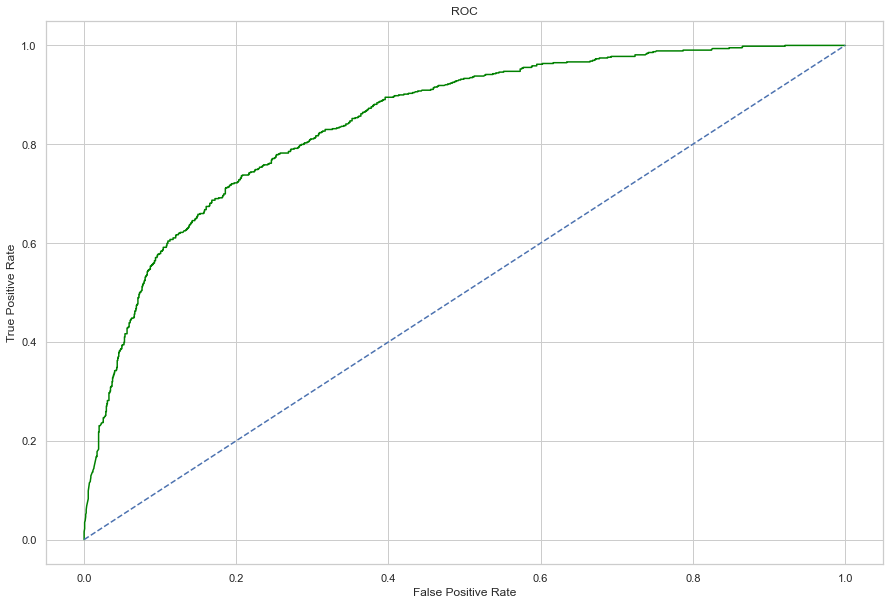

In [192]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [193]:
confusion_matrix(test_labels,ytest_predict)

array([[555,  50],
       [163, 132]], dtype=int64)

In [194]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7633333333333333

In [195]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.73      0.45      0.55       295

    accuracy                           0.76       900
   macro avg       0.75      0.68      0.70       900
weighted avg       0.76      0.76      0.75       900



In [196]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.45
rf_test_f1  0.55


Area under Curve is 0.8174926460288557


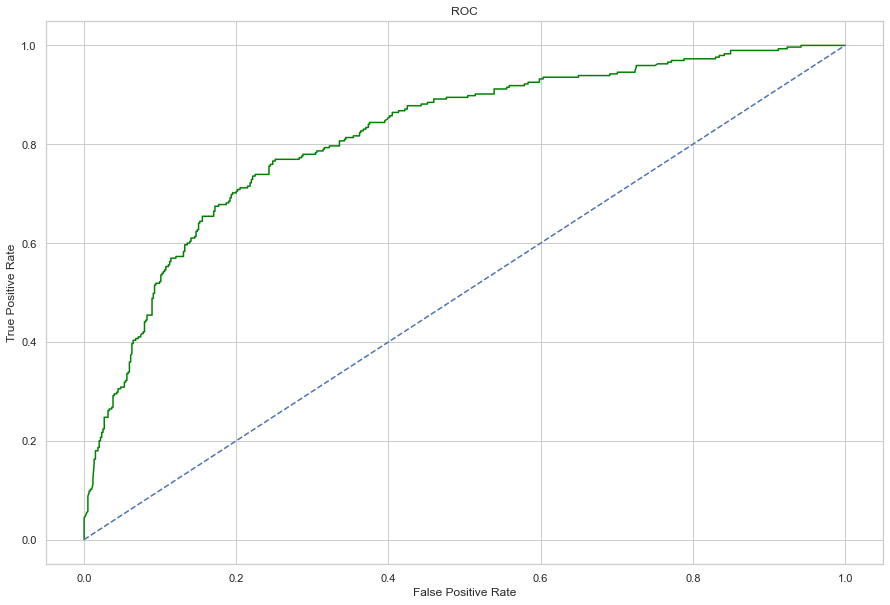

In [197]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [198]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.341857
Product_Name  0.231145
Sales         0.155548
Commision     0.105990
Type          0.063186
Duration      0.050408
Age           0.042582
Destination   0.009283
Channel       0.000000


# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 84.45%       (0.8444646309844054) 
    Accuracy: 80.4%   (0.8042857142857143)     
    Precision: 72%        
    f1-Score: 63%       
            
<b>Test Data:</b>      
    AUC: 0.82%      (0.8174926460288557)
    Accuracy: 76.4%    (0.7633333333333333)      
    Precision: 73%       
    f1-Score: 55%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Agency_Code is again the most important variable for claim status

# Building a Neural Network Classifier

In [199]:
param_grid = {
    'hidden_layer_sizes': [100,1], # 50, 200
    'max_iter': [1000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [200]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}

In [201]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=1, tol=0.01)

## Predicting the Training and Testing data

In [202]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## NN Model Performance Evaluation on Training data

In [203]:
confusion_matrix(train_labels,ytrain_predict)

array([[1363,  108],
       [ 362,  267]], dtype=int64)

In [204]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7761904761904762

In [205]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1471
           1       0.71      0.42      0.53       629

    accuracy                           0.78      2100
   macro avg       0.75      0.68      0.69      2100
weighted avg       0.77      0.78      0.76      2100



In [206]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.71
nn_train_recall  0.42
nn_train_f1  0.53


Area under Curve is 0.8145708390839754


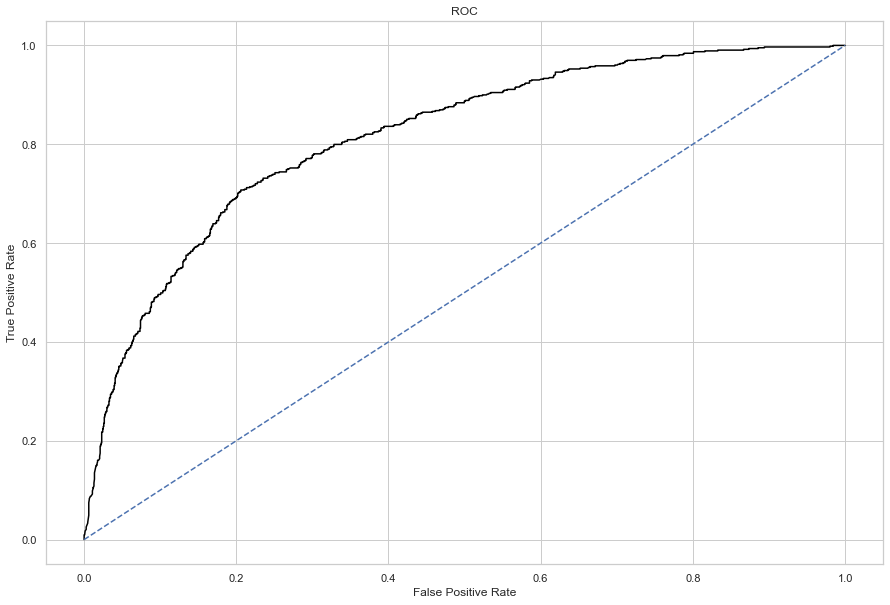

In [207]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [208]:
confusion_matrix(test_labels,ytest_predict)

array([[572,  33],
       [185, 110]], dtype=int64)

In [209]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7577777777777778

In [210]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       605
           1       0.77      0.37      0.50       295

    accuracy                           0.76       900
   macro avg       0.76      0.66      0.67       900
weighted avg       0.76      0.76      0.73       900



In [211]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.77
nn_test_recall  0.37
nn_test_f1  0.5


Area under Curve is 0.7882252416304805


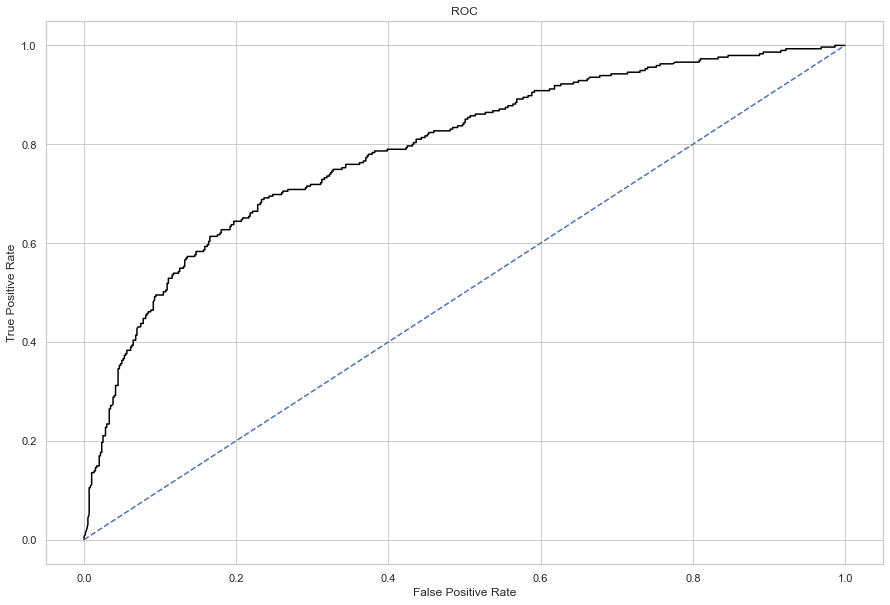

In [212]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [213]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=1, tol=0.01)>

# Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 81.5%        (0.8145708390839754)
    
    Accuracy: 77.6%       (0.7761904761904762)   
    Precision: 72%        
    f1-Score: 63%     
            
<b>Test Data:</b>      
    AUC: 78.82%      (0.7882252416304805)
    
    Accuracy: 75.78%      (0.7577777777777778)  
    Precision: 73%       
    f1-Score: 55%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  

<h5>
2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.
    </h5>

<h5>
2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.
    </h5>

# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [214]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.76,0.80,0.76,0.78,0.76
AUC,0.84,0.80,0.84,0.82,0.81,0.79
Recall,0.57,0.43,0.56,0.45,0.42,0.37
Precision,0.71,0.72,0.72,0.73,0.71,0.77
F1 Score,0.63,0.54,0.63,0.55,0.53,0.50


<AxesSubplot:title={'center':'3 models comparison'}>

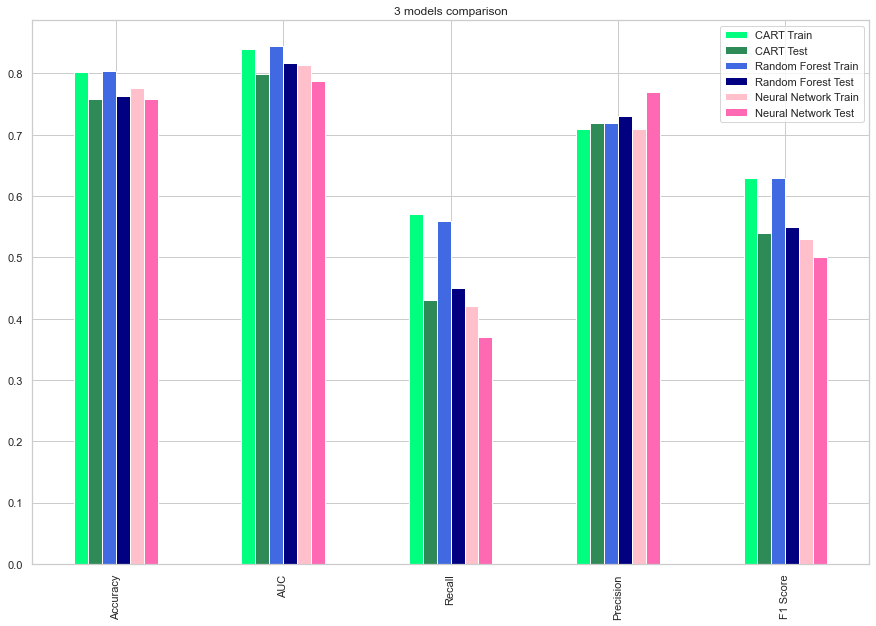

In [215]:
# plot grouped bar chart
data.plot(kind='bar',stacked=False,title='3 models comparison', color=["springgreen","seagreen","royalblue","navy","pink","hotpink"])

## ROC Curve for the 3 models on the Training data

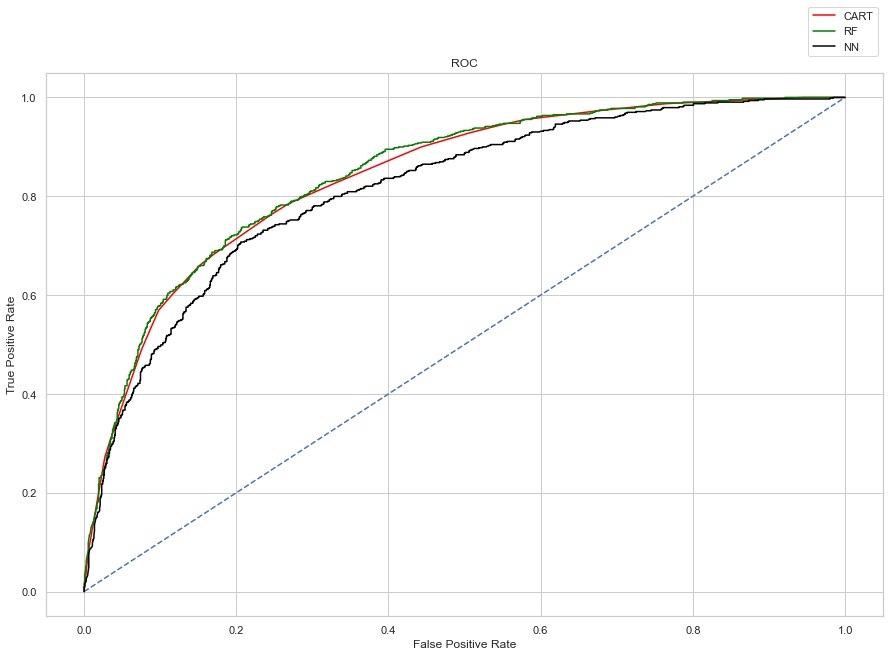

In [216]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on the Test data

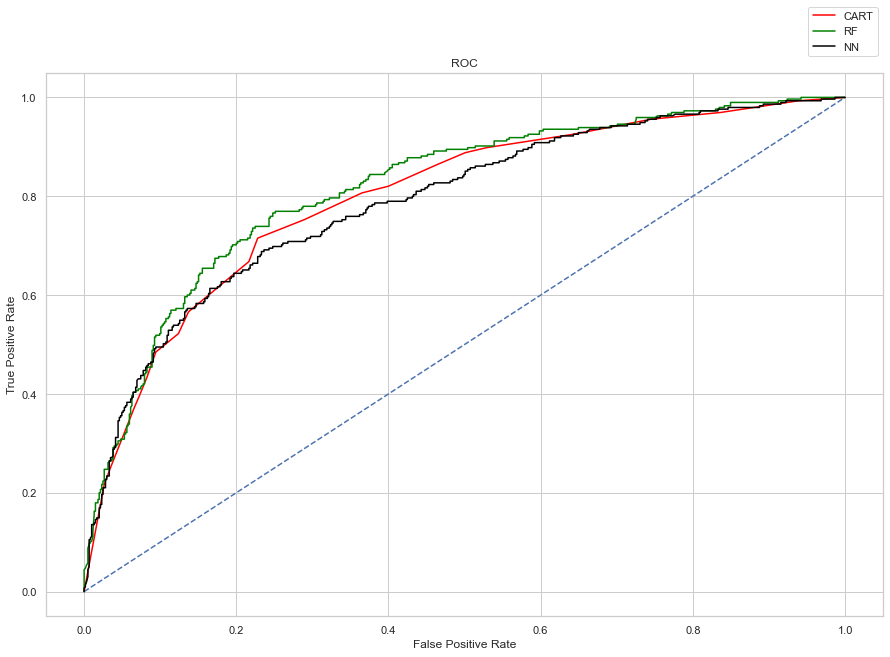

In [217]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.
From Cart and Random Forest Model, the agency code  is found to be the most useful feature amongst all other features for predicting if a person has claimed or not. agency code has the most influence on the claim status.

<h5>
2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.
    </h5>